# Section 1: Creation of my dataset with 440 gene IDs (columns) and 9126 Patient Ids (rows)

*   In this section I load in the PANCAN RNA-Seq data file.
*   To filter this dataset down I also load in the "9126 Immune Genes" dataset to filter the genes down to 440
*   I use the S1 matrix table dataset to filter the patient IDs and extract the immune subtypes

Instead of using the provided 9126 dataset for everything I filtered using both datasets. I extracted the barcodes from the S1 matrix tables by merging the first three column.

I then needed to reformat in order to filter but these steps are all documnted below.

In the end of this section I was left with a functional dataset containing 9126 rows and 440 gene ids as columns which will be used as features for classification. The barcodes also include the immune subtype for classification.

**Note**: The gene IDs used are the ones that were in the original PANCAN RNA-seq data not the other filter files as I wanted to use the correct raw data



## Loading in the RNA-Seq data

This code below is simply me mounting my google drive where I stored all my data as I used Google Colab for this project

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/Queens/Module6/EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv"

df = pd.read_csv(file_path, sep="\t")  # I used \t as this was a tsv not a csv file
print(df.head())


       gene_id  TCGA-OR-A5J1-01A-11R-A29S-07  TCGA-OR-A5J2-01A-11R-A29S-07  \
0  ?|100130426                        0.0000                        0.0000   
1  ?|100133144                        3.2661                        2.6815   
2  ?|100134869                        3.9385                        8.9948   
3      ?|10357                      149.1350                       81.0777   
4      ?|10431                     2034.1000                     1304.9300   

   TCGA-OR-A5J3-01A-11R-A29S-07  TCGA-OR-A5J5-01A-11R-A29S-07  \
0                        0.0000                        0.0000   
1                        1.7301                        0.0000   
2                        6.5650                        1.5492   
3                       86.4879                       53.9117   
4                     1054.6600                     2350.8900   

   TCGA-OR-A5J6-01A-31R-A29S-07  TCGA-OR-A5J7-01A-11R-A29S-07  \
0                        0.0000                        0.0000   
1         

In [ ]:
df.shape

(20531, 11070)

## Loading in the filter dataset (9126 Samples and 440 Genes) for filtering  Gene_IDs

In [ ]:
filter_df = pd.read_csv("/content/drive/MyDrive/Queens/Module6/9126_Immune_Genes.csv")
filter_df.columns

Index(['Unnamed: 0', 'TCGA.02.0047.GBM.C4', 'TCGA.02.0055.GBM.C4',
       'TCGA.02.2483.GBM.C4', 'TCGA.02.2485.GBM.C4', 'TCGA.02.2486.GBM.C4',
       'TCGA.04.1348.OV.C2', 'TCGA.04.1357.OV.C2', 'TCGA.04.1362.OV.C4',
       'TCGA.04.1364.OV.C1',
       ...
       'TCGA.ZP.A9D2.LIHC.C2', 'TCGA.ZP.A9D4.LIHC.C4', 'TCGA.ZQ.A9CR.STAD.C1',
       'TCGA.ZR.A9CJ.ESCA.C1', 'TCGA.ZS.A9CD.LIHC.C3', 'TCGA.ZS.A9CE.LIHC.C4',
       'TCGA.ZS.A9CF.LIHC.C4', 'TCGA.ZS.A9CG.LIHC.C3', 'TCGA.ZU.A8S4.CHOL.C1',
       'TCGA.ZX.AA5X.CESC.C2'],
      dtype='object', length=9127)

In [ ]:
filter_df

Unnamed: 0  TCGA.02.0047.GBM.C4  TCGA.02.0055.GBM.C4  \
0     ACTL6A_S5             745.5670            1154.3100   
1      ADAM9_S2            4287.7800            9475.5400   
2    ADAMTS1_S5             241.5560            6098.9500   
3      ADCY7_S3            1067.6400             556.1320   
4      AIMP2_S5             406.7360             537.0880   
..          ...                  ...                  ...   
435    WNT2B_S2              43.0253              44.8493   
436    WNT8B_S2               0.0000               0.0000   
437     WSB2_S5            4291.4700            2494.1800   
438   ZWILCH_S5             260.2110             467.5600   
439      ZYX_S2            3867.9700           11481.4000   

     TCGA.02.2483.GBM.C4  TCGA.02.2485.GBM.C4  TCGA.02.2486.GBM.C4  \
0              1498.6800            1320.0000            1404.2700   
1              2307.1200            2685.7100            2843.9000   
2               433.9840             911.9050             321.9510   
3               497.3090             316.6670             637.8050   
4               752.1480             785.5520             792.9630   
..                   ...                  ...                  ...   
435              10.1319              18.5714               7.3171   
436               0.8443               0.9524               0.6098   
437            4128.7600            3609.5200            2747.5600   
438             682.2420             440.3860             166.6890   
439            5066.8100            5090.9500            7800.0000   

     TCGA.04.1348.OV.C2  TCGA.04.1357.OV.C2  TCGA.04.1362.OV.C4  \
0           3504.629533         1293.399416         2882.595819   
1           1107.601536         1064.576057         2617.298339   
2           1956.185336         1916.188921         1367.380382   
3            561.609041          886.611634          473.008085   
4           1838.741423          805.563620          363.847507   
..                  ...                 ...                 ...   
435            6.826312            8.818140           35.562682   
436           13.784637            1.288687            8.450941   
437         1230.028133          883.046894         1244.651806   
438          900.194079          191.283160          410.995532   
439        11653.363876         4027.805886         4584.717193   

     TCGA.04.1364.OV.C1  ...  TCGA.ZP.A9D2.LIHC.C2  TCGA.ZP.A9D4.LIHC.C4  \
0           2020.798919  ...              986.5360              610.3800   
1           1093.064945  ...             3511.2800              368.2650   
2            604.273517  ...              489.8110              626.7850   
3            348.507899  ...              264.9200              113.7040   
4           1133.047832  ...              721.0260              744.9470   
..                  ...  ...                   ...                   ...   
435           73.287577  ...                8.7336                5.6569   
436           20.329321  ...                0.7278                0.5657   
437         1117.560376  ...             2286.3900             1176.0700   
438          885.856405  ...              393.3480              216.0090   
439         4463.715766  ...             4038.9400             2386.0800   

     TCGA.ZQ.A9CR.STAD.C1  TCGA.ZR.A9CJ.ESCA.C1  TCGA.ZS.A9CD.LIHC.C3  \
0             1491.324446           1252.608630              386.1760   
1             5451.959018           7047.163688              416.2280   
2             3690.093898           1634.302502             2046.5800   
3              561.088712           1464.455684              100.6760   
4              738.072372            516.796893              980.8410   
..                    ...                   ...                   ...   
435             81.463390             15.900666                5.2592   
436             -0.045485              1.989654                0.0000   
437           1133.665431           2397.344546         

Below I am just testing to see if the segment taken from my barcddes from my base dataset matches with the filter dataset

In [ ]:
matching_columns = filter_df.loc[:, filter_df.columns.str.contains('TCGA.04.1348')]
print(matching_columns)


     TCGA.04.1348.OV.C2
0           3504.629533
1           1107.601536
2           1956.185336
3            561.609041
4           1838.741423
..                  ...
435            6.826312
436           13.784637
437         1230.028133
438          900.194079
439        11653.363876

[440 rows x 1 columns]


## Filter Genes First

I first remove the _S section of the Gene Name as these are not contained in the original dataset

In [ ]:
filter_df['Unnamed: 0'] = filter_df['Unnamed: 0'].str.replace(r'_S\d+', '', regex=True)
print(filter_df['Unnamed: 0'].head())


0     ACTL6A
1      ADAM9
2    ADAMTS1
3      ADCY7
4      AIMP2
Name: Unnamed: 0, dtype: object


I split the gene_name columns by "|" to extract the relevant part of the gene name which I needed

In [ ]:
df['gene_name'] = df['gene_id'].str.split('|').str[0]

print(df['gene_name'].head())


0    ?
1    ?
2    ?
3    ?
4    ?
Name: gene_name, dtype: object


I filter below using these two columns and I now have filtered the dataset down to 440 genes which is the amount required

In [ ]:
filtered_df = df[df['gene_name'].isin(filter_df['Unnamed: 0'])]
print(filtered_df.shape)


(440, 11071)


In [ ]:
filtered_df

gene_id  TCGA-OR-A5J1-01A-11R-A29S-07  \
234       ACTL6A|86                      829.0110   
293      ADAM9|8754                      542.2670   
304    ADAMTS1|9510                      377.0410   
339       ADCY7|113                      183.4770   
478      AIMP2|7965                      338.8230   
...             ...                           ...   
19617    WNT2B|7482                       11.5274   
19627    WNT8B|7479                        0.0000   
19635    WSB2|55884                     1731.5100   
20521  ZWILCH|55055                      183.9580   
20528      ZYX|7791                     1841.0200   

       TCGA-OR-A5J2-01A-11R-A29S-07  TCGA-OR-A5J3-01A-11R-A29S-07  \
234                        935.3100                      756.0360   
293                       1612.1300                     1101.4700   
304                       1453.5000                      777.9590   
339                        281.0360                      117.3160   
478                       1001.0200                     1081.9800   
...                             ...                           ...   
19617                       10.8710                        0.5925   
19627                        0.4026                        3.5550   
19635                     5007.1100                     2508.6700   
20521                      264.1250                       90.6532   
20528                     3059.9900                     2655.6100   

       TCGA-OR-A5J5-01A-11R-A29S-07  TCGA-OR-A5J6-01A-31R-A29S-07  \
234                        512.0060                      410.7600   
293                        431.4490                     2296.9000   
304                         48.7994                      310.7240   
339                        333.0750                      250.3680   
478                        198.4740                      477.4030   
...                             ...                           ...   
19617                       17.0411                       11.1771   
19627                        0.7746                        0.0000   
19635                     1889.2300                     3739.8700   
20521                      260.2630                       64.2685   
20528                     2367.9300                      708.0710   

       TCGA-OR-A5J7-01A-11R-A29S-07  TCGA-OR-A5J8-01A-11R-A29S-07  \
234                        873.2450                      789.8880   
293                       1594.4600                     2012.0200   
304                        738.4680                     1857.8500   
339                         78.6201                      791.5460   
478                       1543.2000                     1062.2500   
...                             ...                           ...   
19617                        3.2090                        5.3875   
19627                        6.0168                        0.0000   
19635                     5845.5700                     2665.1500   
20521                      217.7900                      520.8330   
20528                      855.1940                    10924.6000   

       TCGA-OR-A5J9-01A-11R-A29S-07  TCGA-OR-A5JA-01A-11R-A29S-07  ...  \
234                        505.2110                      831.9240  ...   
293                        735.0370                      841.9660  ...   
304                        426.6750                     1266.3800  ...   
339                        115.9330                      186.0470  ...   
478                        449.1990                      595.5180  ...   
...                             ...                           ...  ...   
19617                        2.7198                        7.3996  ...   
19627                        0.0000                        2.6427  ...   
19635                     3520.8400                     2165.9600  ...   
20521                      219.8960                      564.9680  ...   
20528                     2122.1600                     1939.2200  ...   


## Filtering the samples to 9126

Only load in the relevant columns to me - I will use these columns to create the initial part of the barcodes that are described at https://docs.gdc.cancer.gov/Encyclopedia/pages/TCGA_Barcode/#barcode-types and then use these to filter the fill barcodes

In [ ]:
immune_df = pd.read_excel("/content/drive/MyDrive/Queens/Module6/1-s2.0-S1074761318301213-mmc2.xlsx", usecols=["TCGA Participant Barcode","Immune Subtype","TCGA Study"])
immune_df

TCGA Participant Barcode TCGA Study Immune Subtype
0                 TCGA-01-0639         OV            NaN
1                 TCGA-02-0007        GBM            NaN
2                 TCGA-02-0011        GBM            NaN
3                 TCGA-02-0023        GBM            NaN
4                 TCGA-02-0025        GBM            NaN
...                        ...        ...            ...
11075             TCGA-ZJ-AAXJ       CESC             C2
11076             TCGA-ZJ-AB0I       CESC             C2
11077             TCGA-ZN-A9VU       MESO             C2
11078             TCGA-ZN-A9VW       MESO             C6
11079             TCGA-ZX-AA5X       CESC             C2

[11080 rows x 3 columns]

I used dropna to remove any non clustered samples or samples in immune subtype that were NA as these arent relevant to my study. This gave me the 9126 samples that were relvant

In [ ]:
filtered_immune_df = immune_df.dropna(subset=['Immune Subtype'])
filtered_immune_df

TCGA Participant Barcode TCGA Study Immune Subtype
9                 TCGA-02-2485        GBM             C4
13                TCGA-05-4410       LUAD             C3
14                TCGA-05-4424       LUAD             C2
15                TCGA-05-4425       LUAD             C6
17                TCGA-06-0156        GBM             C4
...                        ...        ...            ...
11075             TCGA-ZJ-AAXJ       CESC             C2
11076             TCGA-ZJ-AB0I       CESC             C2
11077             TCGA-ZN-A9VU       MESO             C2
11078             TCGA-ZN-A9VW       MESO             C6
11079             TCGA-ZX-AA5X       CESC             C2

[9126 rows x 3 columns]

Here I merge the now filtered immune dataset first three rows into a merged column to create my barcodes which I iwll use

In [ ]:
import pandas as pd

filtered_immune_df = filtered_immune_df.copy()

filtered_immune_df["Merged"] = (
    filtered_immune_df["TCGA Participant Barcode"] + "-"
    + filtered_immune_df["TCGA Study"] + "-"
    + filtered_immune_df["Immune Subtype"]
)

print(filtered_immune_df.shape)


(9126, 4)


###Mapping Filtered DataFrame Columns to Merged Names

### Overview
I am renaming the columns of `filtered_df` using my new corresponding **"Merged"** names from `filtered_immune_df`. This ensures that each column in `filtered_df` is correctly matched.

1. **Creating a dictionary (`matching_columns_dict`)**  
   - This will store the mapping between the original column names in `filtered_df` and their corresponding "Merged" names.

2. **Tracking used barcodes (`used_barcodes`)**  
   - Since each barcode should be used only once, I keep a set to make sure that no barcode is assigned multiple times.

3. **Iterating through columns and barcodes**  
   - For each column in `filtered_df`, I check if its associated barcode exists in `immune_participant_barcodes`.  
   - If the barcode is **valid and unused**, I look up its corresponding **"Merged"** name in `filtered_immune_df`.  
   - I then add this mapping to `matching_columns_dict` and mark the barcode as used.








In [ ]:
immune_participant_barcodes = set(filtered_immune_df["TCGA Participant Barcode"])

In [ ]:
filtered_barcodes = filtered_df.columns.str.split('-').str[:3].str.join('-')

In [ ]:
matching_columns_dict = {}
used_barcodes = set()  # Here I track which barcodes have already been matched as there were some cases with a number of samples

for col, barcode in zip(filtered_df.columns, filtered_barcodes):
    if barcode in immune_participant_barcodes and barcode not in used_barcodes:
        merged_name = filtered_immune_df.loc[
            filtered_immune_df["TCGA Participant Barcode"] == barcode, "Merged"
        ].values[0]

        matching_columns_dict[col] = merged_name  # I map original column to new name
        used_barcodes.add(barcode)  # This barcode is now marked as used so that my code wont end up with extra matches

In [ ]:
matched_df = filtered_df[list(matching_columns_dict.keys())].rename(columns=matching_columns_dict)

print(f"Total number of unique matching columns: {len(matching_columns_dict)}")
print(f"Some renamed columns: {list(matched_df.columns[:10])}")

Total number of unique matching columns: 9126
Some renamed columns: ['TCGA-OR-A5J1-ACC-C4', 'TCGA-OR-A5J2-ACC-C3', 'TCGA-OR-A5J3-ACC-C4', 'TCGA-OR-A5J5-ACC-C4', 'TCGA-OR-A5J6-ACC-C4', 'TCGA-OR-A5J7-ACC-C4', 'TCGA-OR-A5J8-ACC-C6', 'TCGA-OR-A5J9-ACC-C3', 'TCGA-OR-A5JA-ACC-C4', 'TCGA-OR-A5JB-ACC-C2']


In [ ]:
# Now I add 'gene_id' back to matched_df as I had to remove when filtering
matched_df['gene_id'] = filtered_df['gene_id']

matched_df = matched_df[['gene_id'] + sorted([col for col in matched_df.columns if col != 'gene_id'])]

print("Matched DataFrame with 'gene_id' added as the first column and the rest ordered alphabetically:")
print(matched_df.head())


Matched DataFrame with 'gene_id' added as the first column and the rest ordered alphabetically:
          gene_id  TCGA-02-0047-GBM-C4  TCGA-02-0055-GBM-C4  \
234     ACTL6A|86              745.567             1154.310   
293    ADAM9|8754             4287.780             9475.540   
304  ADAMTS1|9510              241.556             6098.950   
339     ADCY7|113             1067.640              556.132   
478    AIMP2|7965              406.736              537.088   

     TCGA-02-2483-GBM-C4  TCGA-02-2485-GBM-C4  TCGA-02-2486-GBM-C4  \
234             1498.680             1320.000             1404.270   
293             2307.120             2685.710             2843.900   
304              433.984              911.905              321.951   
339              497.309              316.667              637.805   
478              752.148              785.552              792.963   

     TCGA-04-1348-OV-C2  TCGA-04-1357-OV-C2  TCGA-04-1362-OV-C4  \
234         3791.522350         1392.

## Ensuring my dataset resembles the 9126x440 dataset and shares column names to show that I have successfully fltered the new dataset

The two datasets have 9127 columns - this is due to the fact that gene name is not yet set as an index and has its own columns

In [ ]:
filter_df #My loaded dataset that was already created on Canvas

Unnamed: 0  TCGA.02.0047.GBM.C4  TCGA.02.0055.GBM.C4  TCGA.02.2483.GBM.C4  \
0       ACTL6A             745.5670            1154.3100            1498.6800   
1        ADAM9            4287.7800            9475.5400            2307.1200   
2      ADAMTS1             241.5560            6098.9500             433.9840   
3        ADCY7            1067.6400             556.1320             497.3090   
4        AIMP2             406.7360             537.0880             752.1480   
..         ...                  ...                  ...                  ...   
435      WNT2B              43.0253              44.8493              10.1319   
436      WNT8B               0.0000               0.0000               0.8443   
437       WSB2            4291.4700            2494.1800            4128.7600   
438     ZWILCH             260.2110             467.5600             682.2420   
439        ZYX            3867.9700           11481.4000            5066.8100   

     TCGA.02.2485.GBM.C4  TCGA.02.2486.GBM.C4  TCGA.04.1348.OV.C2  \
0              1320.0000            1404.2700         3504.629533   
1              2685.7100            2843.9000         1107.601536   
2               911.9050             321.9510         1956.185336   
3               316.6670             637.8050          561.609041   
4               785.5520             792.9630         1838.741423   
..                   ...                  ...                 ...   
435              18.5714               7.3171            6.826312   
436               0.9524               0.6098           13.784637   
437            3609.5200            2747.5600         1230.028133   
438             440.3860             166.6890          900.194079   
439            5090.9500            7800.0000        11653.363876   

     TCGA.04.1357.OV.C2  TCGA.04.1362.OV.C4  TCGA.04.1364.OV.C1  ...  \
0           1293.399416         2882.595819         2020.798919  ...   
1           1064.576057         2617.298339         1093.064945  ...   
2           1916.188921         1367.380382          604.273517  ...   
3            886.611634          473.008085          348.507899  ...   
4            805.563620          363.847507         1133.047832  ...   
..                  ...                 ...                 ...  ...   
435            8.818140           35.562682           73.287577  ...   
436            1.288687            8.450941           20.329321  ...   
437          883.046894         1244.651806         1117.560376  ...   
438          191.283160          410.995532          885.856405  ...   
439         4027.805886         4584.717193         4463.715766  ...   

     TCGA.ZP.A9D2.LIHC.C2  TCGA.ZP.A9D4.LIHC.C4  TCGA.ZQ.A9CR.STAD.C1  \
0                986.5360              610.3800           1491.324446   
1               3511.2800              368.2650           5451.959018   
2                489.8110              626.7850           3690.093898   
3                264.9200              113.7040            561.088712   
4                721.0260              744.9470            738.072372   
..                    ...                   ...                   ...   
435                8.7336                5.6569             81.463390   
436                0.7278                0.5657             -0.045485   
437             2286.3900             1176.0700           1133.665431   
438              393.3480              216.0090            915.681368   
439             4038.9400             2386.0800           3922.604682   

     TCGA.ZR.A9CJ.ESCA.C1  TCGA.ZS.A9CD.LIHC.C3  TCGA.ZS.A9CE.LIHC.C4  \
0             1252.608630              386.1760              472.6480   
1             7047.163688              416.2280              178.8840   
2             1634.302502             2046.5800              135.6670   
3             1464.455684              100.6760               35.5580   
4              516.796893              980.8410             1434.8000   
..                    

In [ ]:
matched_df.columns


Index(['gene_id', 'TCGA-02-0047-GBM-C4', 'TCGA-02-0055-GBM-C4',
       'TCGA-02-2483-GBM-C4', 'TCGA-02-2485-GBM-C4', 'TCGA-02-2486-GBM-C4',
       'TCGA-04-1348-OV-C2', 'TCGA-04-1357-OV-C2', 'TCGA-04-1362-OV-C4',
       'TCGA-04-1364-OV-C1',
       ...
       'TCGA-ZP-A9D2-LIHC-C2', 'TCGA-ZP-A9D4-LIHC-C4', 'TCGA-ZQ-A9CR-STAD-C1',
       'TCGA-ZR-A9CJ-ESCA-C1', 'TCGA-ZS-A9CD-LIHC-C3', 'TCGA-ZS-A9CE-LIHC-C4',
       'TCGA-ZS-A9CF-LIHC-C4', 'TCGA-ZS-A9CG-LIHC-C3', 'TCGA-ZU-A8S4-CHOL-C1',
       'TCGA-ZX-AA5X-CESC-C2'],
      dtype='object', length=9127)

In [ ]:
filter_df.columns

Index(['Unnamed: 0', 'TCGA.02.0047.GBM.C4', 'TCGA.02.0055.GBM.C4',
       'TCGA.02.2483.GBM.C4', 'TCGA.02.2485.GBM.C4', 'TCGA.02.2486.GBM.C4',
       'TCGA.04.1348.OV.C2', 'TCGA.04.1357.OV.C2', 'TCGA.04.1362.OV.C4',
       'TCGA.04.1364.OV.C1',
       ...
       'TCGA.ZP.A9D2.LIHC.C2', 'TCGA.ZP.A9D4.LIHC.C4', 'TCGA.ZQ.A9CR.STAD.C1',
       'TCGA.ZR.A9CJ.ESCA.C1', 'TCGA.ZS.A9CD.LIHC.C3', 'TCGA.ZS.A9CE.LIHC.C4',
       'TCGA.ZS.A9CF.LIHC.C4', 'TCGA.ZS.A9CG.LIHC.C3', 'TCGA.ZU.A8S4.CHOL.C1',
       'TCGA.ZX.AA5X.CESC.C2'],
      dtype='object', length=9127)

Here I can see that I have sucessfully gotten teh same shape and columns as I wanted and the correct columns have been selected.

The only mismatch came as the gene_id column in the canvas dataset was loaded in an Unnamed 0

In [ ]:
converted_filtered_barcodes = filter_df.columns.str.replace(r"\.", "-", regex=True)

matching_columns = [col for col in converted_filtered_barcodes if col in matched_df.columns]

print(f"Matching columns between filtered_df and matched_df: {len(matching_columns)}")
print(matching_columns)

non_matching_columns = [col for col in converted_filtered_barcodes if col not in matched_df.columns]

print(f"Non-matching columns between filtered_df and matched_df: {len(non_matching_columns)}")
print(non_matching_columns)


Matching columns between filtered_df and matched_df: 9126
['TCGA-02-0047-GBM-C4', 'TCGA-02-0055-GBM-C4', 'TCGA-02-2483-GBM-C4', 'TCGA-02-2485-GBM-C4', 'TCGA-02-2486-GBM-C4', 'TCGA-04-1348-OV-C2', 'TCGA-04-1357-OV-C2', 'TCGA-04-1362-OV-C4', 'TCGA-04-1364-OV-C1', 'TCGA-04-1365-OV-C2', 'TCGA-04-1514-OV-C2', 'TCGA-04-1519-OV-C4', 'TCGA-05-4244-LUAD-C4', 'TCGA-05-4249-LUAD-C3', 'TCGA-05-4382-LUAD-C6', 'TCGA-05-4384-LUAD-C3', 'TCGA-05-4389-LUAD-C2', 'TCGA-05-4390-LUAD-C1', 'TCGA-05-4395-LUAD-C2', 'TCGA-05-4396-LUAD-C3', 'TCGA-05-4398-LUAD-C2', 'TCGA-05-4402-LUAD-C2', 'TCGA-05-4403-LUAD-C6', 'TCGA-05-4405-LUAD-C3', 'TCGA-05-4410-LUAD-C3', 'TCGA-05-4415-LUAD-C2', 'TCGA-05-4417-LUAD-C3', 'TCGA-05-4418-LUAD-C2', 'TCGA-05-4420-LUAD-C1', 'TCGA-05-4422-LUAD-C2', 'TCGA-05-4424-LUAD-C2', 'TCGA-05-4425-LUAD-C6', 'TCGA-05-4426-LUAD-C6', 'TCGA-05-4430-LUAD-C2', 'TCGA-05-4432-LUAD-C2', 'TCGA-05-4433-LUAD-C3', 'TCGA-05-5423-LUAD-C2', 'TCGA-05-5425-LUAD-C2', 'TCGA-05-5428-LUAD-C2', 'TCGA-05-5429-LUAD-C1', 

In [ ]:
matched_df

gene_id  TCGA-02-0047-GBM-C4  TCGA-02-0055-GBM-C4  \
234       ACTL6A|86             745.5670            1154.3100   
293      ADAM9|8754            4287.7800            9475.5400   
304    ADAMTS1|9510             241.5560            6098.9500   
339       ADCY7|113            1067.6400             556.1320   
478      AIMP2|7965             406.7360             537.0880   
...             ...                  ...                  ...   
19617    WNT2B|7482              43.0253              44.8493   
19627    WNT8B|7479               0.0000               0.0000   
19635    WSB2|55884            4291.4700            2494.1800   
20521  ZWILCH|55055             260.2110             467.5600   
20528      ZYX|7791            3867.9700           11481.4000   

       TCGA-02-2483-GBM-C4  TCGA-02-2485-GBM-C4  TCGA-02-2486-GBM-C4  \
234              1498.6800            1320.0000            1404.2700   
293              2307.1200            2685.7100            2843.9000   
304               433.9840             911.9050             321.9510   
339               497.3090             316.6670             637.8050   
478               752.1480             785.5520             792.9630   
...                    ...                  ...                  ...   
19617              10.1319              18.5714               7.3171   
19627               0.8443               0.9524               0.6098   
19635            4128.7600            3609.5200            2747.5600   
20521             682.2420             440.3860             166.6890   
20528            5066.8100            5090.9500            7800.0000   

       TCGA-04-1348-OV-C2  TCGA-04-1357-OV-C2  TCGA-04-1362-OV-C4  \
234           3791.522350         1392.931125         3115.782838   
293           1216.342567         1168.638640         2898.673697   
304           1991.757514         1950.705475         1388.190309   
339            535.897804          848.049876          450.944734   
478           1732.308573          751.999809          336.640981   
...                   ...                 ...                 ...   
19617            6.463856            8.378060           34.241260   
19627           13.688305            1.270351            8.385969   
19635         1274.201029          912.288865         1289.474265   
20521         1018.226589          213.949506          462.214865   
20528         9692.870954         3284.754545         3747.937644   

       TCGA-04-1364-OV-C1  ...  TCGA-ZP-A9D2-LIHC-C2  TCGA-ZP-A9D4-LIHC-C4  \
234           2180.731348  ...              986.5360              610.3800   
293           1200.223229  ...             3511.2800              368.2650   
304            609.404025  ...              489.8110              626.7850   
339            331.714248  ...              264.9200              113.7040   
478           1061.735692  ...              721.0260              744.9470   
...                   ...  ...                   ...                   ...   
19617           70.952910  ...                8.7336                5.6569   
19627           20.196619  ...                0.7278                0.5657   
19635         1156.788652  ...             2286.3900             1176.0700   
20521         1001.889808  ...              393.3480              216.0090   
20528         3647.207428  ...             4038.9400             2386.0800   

       TCGA-ZQ-A9CR-STAD-C1  TCGA-ZR-A9CJ-ESCA-C1  TCGA-ZS-A9CD-LIHC-C3  \
234             1491.324446           1252.608630              386.1760   
293             5451.959018           7047.163688              416.2280   
304             3690.093898           1634.302502             2046.5800   
339              561.088712           1464.455684              100.6760   
478              738.072372            516.796893              980.8410   
...                     ...                   ...                   ...   
19617             81.463390             15.900666                5.2592   


## Final Dataset Transformations

I have the correct number of genes and samples, but I need the genes to be features (columns) rather than rows. To achieve this, I **first set 'Samples' as the index** and then **transpose the dataset** so that `gene_id` values become column names.

### Steps I Took:

1. **Set 'Samples (Originally Gene ID title)' as the Index**  
   - I set the Samples column as the index, so each row corresponds to a unique sample.

2. **Transpose the DataFrame**  
   - I flipped the dataset so that genes are now columns and samples remain as rows.

3. **Saved the Transformed Data**  
   - I saved the dataset as a CSV file to Google Drive with shape (9126,440)

In [ ]:
matched_df.rename(columns={'gene_id': 'Samples'}, inplace=True)
matched_df

Samples  TCGA-02-0047-GBM-C4  TCGA-02-0055-GBM-C4  \
234       ACTL6A|86             745.5670            1154.3100   
293      ADAM9|8754            4287.7800            9475.5400   
304    ADAMTS1|9510             241.5560            6098.9500   
339       ADCY7|113            1067.6400             556.1320   
478      AIMP2|7965             406.7360             537.0880   
...             ...                  ...                  ...   
19617    WNT2B|7482              43.0253              44.8493   
19627    WNT8B|7479               0.0000               0.0000   
19635    WSB2|55884            4291.4700            2494.1800   
20521  ZWILCH|55055             260.2110             467.5600   
20528      ZYX|7791            3867.9700           11481.4000   

       TCGA-02-2483-GBM-C4  TCGA-02-2485-GBM-C4  TCGA-02-2486-GBM-C4  \
234              1498.6800            1320.0000            1404.2700   
293              2307.1200            2685.7100            2843.9000   
304               433.9840             911.9050             321.9510   
339               497.3090             316.6670             637.8050   
478               752.1480             785.5520             792.9630   
...                    ...                  ...                  ...   
19617              10.1319              18.5714               7.3171   
19627               0.8443               0.9524               0.6098   
19635            4128.7600            3609.5200            2747.5600   
20521             682.2420             440.3860             166.6890   
20528            5066.8100            5090.9500            7800.0000   

       TCGA-04-1348-OV-C2  TCGA-04-1357-OV-C2  TCGA-04-1362-OV-C4  \
234           3791.522350         1392.931125         3115.782838   
293           1216.342567         1168.638640         2898.673697   
304           1991.757514         1950.705475         1388.190309   
339            535.897804          848.049876          450.944734   
478           1732.308573          751.999809          336.640981   
...                   ...                 ...                 ...   
19617            6.463856            8.378060           34.241260   
19627           13.688305            1.270351            8.385969   
19635         1274.201029          912.288865         1289.474265   
20521         1018.226589          213.949506          462.214865   
20528         9692.870954         3284.754545         3747.937644   

       TCGA-04-1364-OV-C1  ...  TCGA-ZP-A9D2-LIHC-C2  TCGA-ZP-A9D4-LIHC-C4  \
234           2180.731348  ...              986.5360              610.3800   
293           1200.223229  ...             3511.2800              368.2650   
304            609.404025  ...              489.8110              626.7850   
339            331.714248  ...              264.9200              113.7040   
478           1061.735692  ...              721.0260              744.9470   
...                   ...  ...                   ...                   ...   
19617           70.952910  ...                8.7336                5.6569   
19627           20.196619  ...                0.7278                0.5657   
19635         1156.788652  ...             2286.3900             1176.0700   
20521         1001.889808  ...              393.3480              216.0090   
20528         3647.207428  ...             4038.9400             2386.0800   

       TCGA-ZQ-A9CR-STAD-C1  TCGA-ZR-A9CJ-ESCA-C1  TCGA-ZS-A9CD-LIHC-C3  \
234             1491.324446           1252.608630              386.1760   
293             5451.959018           7047.163688              416.2280   
304             3690.093898           1634.302502             2046.5800   
339              561.088712           1464.455684              100.6760   
478              738.072372            516.796893              980.8410   
...                     ...                   ...                   ...   
19617             81.463390             15.900666                5.2592   


In [ ]:
matched_df.set_index('Samples', inplace=True)
print(matched_df)


              TCGA-02-0047-GBM-C4  TCGA-02-0055-GBM-C4  TCGA-02-2483-GBM-C4  \
Samples                                                                       
ACTL6A|86                745.5670            1154.3100            1498.6800   
ADAM9|8754              4287.7800            9475.5400            2307.1200   
ADAMTS1|9510             241.5560            6098.9500             433.9840   
ADCY7|113               1067.6400             556.1320             497.3090   
AIMP2|7965               406.7360             537.0880             752.1480   
...                           ...                  ...                  ...   
WNT2B|7482                43.0253              44.8493              10.1319   
WNT8B|7479                 0.0000               0.0000               0.8443   
WSB2|55884              4291.4700            2494.1800            4128.7600   
ZWILCH|55055             260.2110             467.5600             682.2420   
ZYX|7791                3867.9700           11481.40

In [ ]:
transposed_df = matched_df.T
print(transposed_df)


Samples               ACTL6A|86  ADAM9|8754  ADAMTS1|9510  ADCY7|113  \
TCGA-02-0047-GBM-C4     745.567    4287.780       241.556   1067.640   
TCGA-02-0055-GBM-C4    1154.310    9475.540      6098.950    556.132   
TCGA-02-2483-GBM-C4    1498.680    2307.120       433.984    497.309   
TCGA-02-2485-GBM-C4    1320.000    2685.710       911.905    316.667   
TCGA-02-2486-GBM-C4    1404.270    2843.900       321.951    637.805   
...                         ...         ...           ...        ...   
TCGA-ZS-A9CE-LIHC-C4    472.648     178.884       135.667     35.558   
TCGA-ZS-A9CF-LIHC-C4    831.151     504.480      1062.720    126.120   
TCGA-ZS-A9CG-LIHC-C3    333.162     920.651       467.524    209.769   
TCGA-ZU-A8S4-CHOL-C1   1176.620    7189.330       512.028    933.317   
TCGA-ZX-AA5X-CESC-C2   1021.660    3178.650       608.662   1081.210   

Samples               AIMP2|7965  ALKBH7|84266  ALOX5AP|241  AMPD3|272  \
TCGA-02-0047-GBM-C4      406.736       518.148    1326.4100  

In [ ]:
transposed_df.shape

(9126, 440)

In [ ]:
transposed_df

Samples               ACTL6A|86  ADAM9|8754  ADAMTS1|9510  ADCY7|113  \
TCGA-02-0047-GBM-C4     745.567    4287.780       241.556   1067.640   
TCGA-02-0055-GBM-C4    1154.310    9475.540      6098.950    556.132   
TCGA-02-2483-GBM-C4    1498.680    2307.120       433.984    497.309   
TCGA-02-2485-GBM-C4    1320.000    2685.710       911.905    316.667   
TCGA-02-2486-GBM-C4    1404.270    2843.900       321.951    637.805   
...                         ...         ...           ...        ...   
TCGA-ZS-A9CE-LIHC-C4    472.648     178.884       135.667     35.558   
TCGA-ZS-A9CF-LIHC-C4    831.151     504.480      1062.720    126.120   
TCGA-ZS-A9CG-LIHC-C3    333.162     920.651       467.524    209.769   
TCGA-ZU-A8S4-CHOL-C1   1176.620    7189.330       512.028    933.317   
TCGA-ZX-AA5X-CESC-C2   1021.660    3178.650       608.662   1081.210   

Samples               AIMP2|7965  ALKBH7|84266  ALOX5AP|241  AMPD3|272  \
TCGA-02-0047-GBM-C4      406.736       518.148    1326.4100   326.9920   
TCGA-02-0055-GBM-C4      537.088       942.957    4211.3500   361.5980   
TCGA-02-2483-GBM-C4      752.148       656.042     566.5430   196.7280   
TCGA-02-2485-GBM-C4      785.552       953.809     307.1430    80.0000   
TCGA-02-2486-GBM-C4      792.963       815.244    5671.9500   542.6830   
...                          ...           ...          ...        ...   
TCGA-ZS-A9CE-LIHC-C4    1434.800      2168.490       1.6411     7.6586   
TCGA-ZS-A9CF-LIHC-C4     492.357      2356.310      50.9993    52.3777   
TCGA-ZS-A9CG-LIHC-C3     730.687      1780.980      55.5270    37.7035   
TCGA-ZU-A8S4-CHOL-C1     479.591       860.526     445.7190   236.8190   
TCGA-ZX-AA5X-CESC-C2     352.281       416.860     522.8150   583.1400   

Samples               APITD1|378708  APOC1|341  ...  VTA1|51534  WDHD1|11169  \
TCGA-02-0047-GBM-C4         184.308    1370.66  ...    1230.520     107.5630   
TCGA-02-0055-GBM-C4         319.535    3093.48  ...    1183.460     162.5790   
TCGA-02-2483-GBM-C4         311.443    3504.38  ...    1514.300     267.2300   
TCGA-02-2485-GBM-C4         260.462    2482.86  ...    1577.620     309.5240   
TCGA-02-2486-GBM-C4         494.488   12512.80  ...    1484.760      45.7317   
...                             ...        ...  ...         ...          ...   
TCGA-ZS-A9CE-LIHC-C4        268.643  189054.00  ...     688.184      49.2341   
TCGA-ZS-A9CF-LIHC-C4        302.839   58041.40  ...     654.721     146.7950   
TCGA-ZS-A9CG-LIHC-C3        284.298  155571.00  ...     758.869      10.9683   
TCGA-ZU-A8S4-CHOL-C1        316.091    1932.44  ...    1304.750     177.9880   
TCGA-ZX-AA5X-CESC-C2        286.102     378.19  ...     920.340     457.0770   

Samples               WDR54|84058  WDR77|79084  WIPF1|7456  WNT2B|7482  \
TCGA-02-0047-GBM-C4      321.4600      925.044   2154.9500     43.0253   
TCGA-02-0055-GBM-C4      585.8440      931.184   1947.5800     44.8493   
TCGA-02-2483-GBM-C4      561.0550     1370.770   1042.7400     10.1319   
TCGA-02-2485-GBM-C4      422.3810      811.905    849.5240     18.5714   
TCGA-02-2486-GBM-C4      669.5120      954.878   2454.8800      7.3171   
...                           ...          ...         ...         ...   
TCGA-ZS-A9CE-LIHC-C4       7.1116      870.350     54.7046      1.6411   
TCGA-ZS-A9CF-LIHC-C4      40.6616      523.087    439.0080      4.1351   
TCGA-ZS-A9CG-LIHC-C3      42.5021      454.499    191.2600      3.4276   
TCGA-ZU-A8S4-CHOL-C1     705.9700     1102.830   1917.9900      5.9828   
TCGA-ZX-AA5X-CESC-C2     287.7030     1037.120   1196.4400     45.6303   

Samples               WNT8B|7479  WSB2|55884  ZWILCH|55055  ZYX|7791  
TCGA-02-0047-GBM-C4       0.0000     4291.47      260.2110   3867.97  
TCGA-02-0055-GBM-C4       0.0000     2494.18      467.5600  11481.40  
TCGA-02-2483-GBM-C4       0.8443     4128.76      682.2420   5066.81  
TCGA-02-2485-GBM-C4       0.9524     3609.52      440.3860   5090.95  
TCGA-02-2486-GBM-C4       0.6098     2747

In [ ]:
#file_path = '/content/drive/MyDrive/Queens/Module6/AssessmentCleanedButMissing.csv'
#transposed_df.to_csv(file_path, index=True)

#print(f"matched_df has been saved as '{file_path}'.")

matched_df has been saved as '/content/drive/MyDrive/Queens/Module6/AssessmentCleanedButMissing.csv'.


# Section 2: Data Preprocessing and Preparation  

In this section, I focus on **cleaning and transforming** the dataset to improve its quality for machine learning models. Proper preprocessing is essential to handle inconsistencies, maintain data integrity, and enhance model performance.  

### Steps I Took:  

1. **Handling Missing Values with MICE (Multiple Imputation by Chained Equations)**  
   - Many real-world datasets have missing values, which can bias results or reduce the model's ability to learn effectively.  
   - Instead of simple imputation methods (like mean or median), I used **MICE (Multiple Imputation by Chained Equations)** via an **Iterative Imputer**.  
   - This method predicts missing values based on relationships with other features, leading to more **accurate and data-driven imputations**.  

2. **Checking for Duplicates**  
   - Duplicate samples can distort the model by giving undue importance to certain patterns.  
   - I examined the dataset for **duplicate rows and redundant entries**, ensuring only unique samples were used for training.  

3. **Identifying Outliers and Checking Value Ranges**  
   - Extreme values (outliers) can have a **significant impact on model performance**, leading to unstable predictions.  
   - I examined the **range of each feature**, detecting and understanding potential outliers to determine whether they were genuine or caused by errors.  
   - Outliers were **not arbitrarily removed** but assessed in the context of domain knowledge.  

4. **Applying Log Transformation to Reduce Skewness**  
   - The dataset exhibited **high skewness**, particularly in RNA expression data, which can **negatively affect models that assume normally distributed data**.  
   - I applied a **log transformation** to **reduce extreme variations while preserving important patterns**.  
   - This step helped to **stabilize variance** and make features more comparable.  

5. **Feature Scaling: Choosing Between Min-Max Scaling and Standard Scaler**  
   - After log transformation, I needed to scale the data to ensure all features had the **same weight** during model training.  
   - I experimented with **Min-Max Scaling and Standard Scaling**:  
     - **Min-Max Scaling (0 to 1 range)** ensures all features contribute equally and is **useful for models like SVM and Neural Networks**.  
     - **Standard Scaling (mean=0, std=1)** is often better for data with a Gaussian distribution.  
   - **Min-Max Scaling outperformed Standard Scaling** in my case, likely because the log transformation already made the data more uniform.  

### Outcome:  
By applying these preprocessing techniques, I created a **clean, well-structured, and normalized dataset**, ensuring it was **optimized for machine learning models** while preserving meaningful biological patterns.  


## Dealing with Missing Values  

I used **MICE (Multiple Imputation by Chained Equations)** to handle missing values, as it preserves feature relationships and maintains data integrity better than simpler methods.  

Why MICE?  

- **Captures Feature Dependencies** – Unlike mean or median imputation, MICE predicts missing values using regression, ensuring consistency.  
- **Handles Complex Patterns** – It is ideal for my genetic data where missing values depend on multiple factors.  
- **Reduces Bias** – Unlike single imputation, MICE maintains natural variability, preventing distortions.  

Why Not Other Methods?  

- **Mean/Median Imputation** – I think it is too simplistic as it ignores feature relationships.  
- **KNN Imputation** – Computationally expensive, assumes local similarity.  
- **Dropping Data** – Reduces sample size and as this is medical data I couldnt afford losing valuable information.  

Using **MICE**, I ensured a statistically sound approach to missing values, preserving variance ehich will help my ML models in the next phase.


I needed to install this in my environment for visualising

In [ ]:
!pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


As I dont want to have to run all the Section 1 code every time I just mounted my drive here and then loaded in my dataset which I had saved

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/Queens/Module6/AssessmentCleanedButMissing.csv", index_col=0)
print(data_df.shape)
data_df

(9126, 440)


ACTL6A|86  ADAM9|8754  ADAMTS1|9510  ADCY7|113  \
TCGA-02-0047-GBM-C4     745.567    4287.780       241.556   1067.640   
TCGA-02-0055-GBM-C4    1154.310    9475.540      6098.950    556.132   
TCGA-02-2483-GBM-C4    1498.680    2307.120       433.984    497.309   
TCGA-02-2485-GBM-C4    1320.000    2685.710       911.905    316.667   
TCGA-02-2486-GBM-C4    1404.270    2843.900       321.951    637.805   
...                         ...         ...           ...        ...   
TCGA-ZS-A9CE-LIHC-C4    472.648     178.884       135.667     35.558   
TCGA-ZS-A9CF-LIHC-C4    831.151     504.480      1062.720    126.120   
TCGA-ZS-A9CG-LIHC-C3    333.162     920.651       467.524    209.769   
TCGA-ZU-A8S4-CHOL-C1   1176.620    7189.330       512.028    933.317   
TCGA-ZX-AA5X-CESC-C2   1021.660    3178.650       608.662   1081.210   

                      AIMP2|7965  ALKBH7|84266  ALOX5AP|241  AMPD3|272  \
TCGA-02-0047-GBM-C4      406.736       518.148    1326.4100   326.9920   
TCGA-02-0055-GBM-C4      537.088       942.957    4211.3500   361.5980   
TCGA-02-2483-GBM-C4      752.148       656.042     566.5430   196.7280   
TCGA-02-2485-GBM-C4      785.552       953.809     307.1430    80.0000   
TCGA-02-2486-GBM-C4      792.963       815.244    5671.9500   542.6830   
...                          ...           ...          ...        ...   
TCGA-ZS-A9CE-LIHC-C4    1434.800      2168.490       1.6411     7.6586   
TCGA-ZS-A9CF-LIHC-C4     492.357      2356.310      50.9993    52.3777   
TCGA-ZS-A9CG-LIHC-C3     730.687      1780.980      55.5270    37.7035   
TCGA-ZU-A8S4-CHOL-C1     479.591       860.526     445.7190   236.8190   
TCGA-ZX-AA5X-CESC-C2     352.281       416.860     522.8150   583.1400   

                      APITD1|378708  APOC1|341  ...  VTA1|51534  WDHD1|11169  \
TCGA-02-0047-GBM-C4         184.308    1370.66  ...    1230.520     107.5630   
TCGA-02-0055-GBM-C4         319.535    3093.48  ...    1183.460     162.5790   
TCGA-02-2483-GBM-C4         311.443    3504.38  ...    1514.300     267.2300   
TCGA-02-2485-GBM-C4         260.462    2482.86  ...    1577.620     309.5240   
TCGA-02-2486-GBM-C4         494.488   12512.80  ...    1484.760      45.7317   
...                             ...        ...  ...         ...          ...   
TCGA-ZS-A9CE-LIHC-C4        268.643  189054.00  ...     688.184      49.2341   
TCGA-ZS-A9CF-LIHC-C4        302.839   58041.40  ...     654.721     146.7950   
TCGA-ZS-A9CG-LIHC-C3        284.298  155571.00  ...     758.869      10.9683   
TCGA-ZU-A8S4-CHOL-C1        316.091    1932.44  ...    1304.750     177.9880   
TCGA-ZX-AA5X-CESC-C2        286.102     378.19  ...     920.340     457.0770   

                      WDR54|84058  WDR77|79084  WIPF1|7456  WNT2B|7482  \
TCGA-02-0047-GBM-C4      321.4600      925.044   2154.9500     43.0253   
TCGA-02-0055-GBM-C4      585.8440      931.184   1947.5800     44.8493   
TCGA-02-2483-GBM-C4      561.0550     1370.770   1042.7400     10.1319   
TCGA-02-2485-GBM-C4      422.3810      811.905    849.5240     18.5714   
TCGA-02-2486-GBM-C4      669.5120      954.878   2454.8800      7.3171   
...                           ...          ...         ...         ...   
TCGA-ZS-A9CE-LIHC-C4       7.1116      870.350     54.7046      1.6411   
TCGA-ZS-A9CF-LIHC-C4      40.6616      523.087    439.0080      4.1351   
TCGA-ZS-A9CG-LIHC-C3      42.5021      454.499    191.2600      3.4276   
TCGA-ZU-A8S4-CHOL-C1     705.9700     1102.830   1917.9900      5.9828   
TCGA-ZX-AA5X-CESC-C2     287.7030     1037.120   1196.4400     45.6303   

                      WNT8B|7479  WSB2|55884  ZWILCH|55055  ZYX|7791  
TCGA-02-0047-GBM-C4       0.0000     4291.47      260.2110   3867.97  
TCGA-02-0055-GBM-C4       0.0000     2494.18      467.5600  11481.40  
TCGA-02-2483-GBM-C4       0.8443     4128.76      682.2420   5066.81  
TCGA-02-2485-GBM-C4       0.9524     3609.52      440.3860   5090.95  
TCGA-02-2486-GBM-C4       0.6098     2747.56      166.6890   78

In [ ]:
# Identify my columns including NA
nan_values = data_df.isna()
nan_columns = nan_values.any()
columns_with_nan = data_df.columns[nan_columns].tolist()
print(columns_with_nan)

['MMP1|4312', 'MMP3|4314', 'MT3|4504', 'PLG|5340', 'RGS8|85397']


In [ ]:
print(data_df.isnull().sum().sum())

2343


I can see from my plot below that there are only two columsn - PLG|5340', 'RGS8|85397' that are missing a significant amount of values. The other columns seem to only be missing a small fraction

<Axes: >

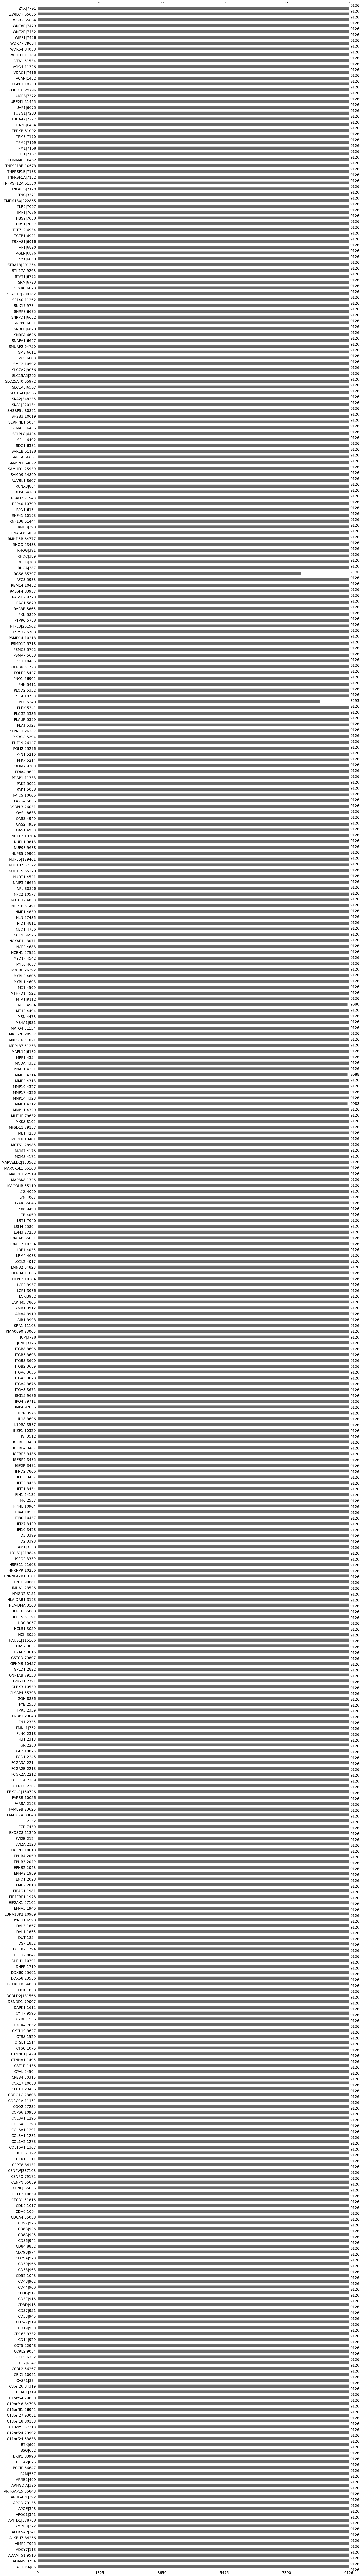

In [ ]:
import missingno as msno
msno.bar(data_df)

Again to visualise it even clearer I used the displot below

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

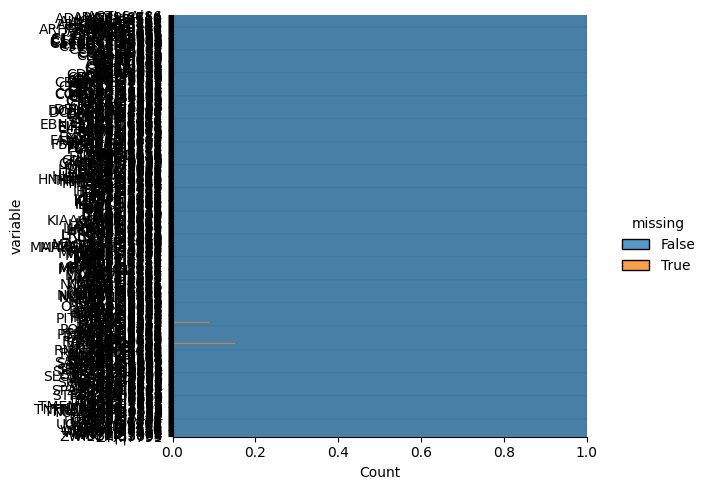

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Now I print the counts of the missing values by gene. As you can see there are two genes with signicant missing values whereas the other columns have a very small fraction missing

In [ ]:
sum_of_missing_vals = data_df.isnull().sum()
print(sum_of_missing_vals[['MMP1|4312']],'\n',sum_of_missing_vals[['MMP3|4314']],'\n',sum_of_missing_vals[['MT3|4504']],'\n',sum_of_missing_vals[['PLG|5340']],'\n',sum_of_missing_vals[['RGS8|85397']])

MMP1|4312    38
dtype: int64 
 MMP3|4314    38
dtype: int64 
 MT3|4504    38
dtype: int64 
 PLG|5340    833
dtype: int64 
 RGS8|85397    1396
dtype: int64


In [ ]:
percent_missing = data_df.isnull().sum() * 100 / len(data_df)

print(percent_missing[['MMP1|4312']], '\n')
print(percent_missing[['MMP3|4314']], '\n')
print(percent_missing[['MT3|4504']], '\n')
print(percent_missing[['PLG|5340']], '\n')
print(percent_missing[['RGS8|85397']])


MMP1|4312    0.416393
dtype: float64 

MMP3|4314    0.416393
dtype: float64 

MT3|4504    0.416393
dtype: float64 

PLG|5340    9.127767
dtype: float64 

RGS8|85397    15.296954
dtype: float64


Here I used the **IterativeImputer** from `sklearn` to apply **(MICE)** for handling missing values in specific genes.

I used random seed to be able to recreate the same reuslts

**Note** Through the project I used my student number 4044925 as the random seed

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=40446925)

data_df[['MMP1|4312']] = mice_imputer.fit_transform(data_df[['MMP1|4312']])
data_df[['MMP3|4314']] = mice_imputer.fit_transform(data_df[['MMP3|4314']])
data_df[['MT3|4504']] = mice_imputer.fit_transform(data_df[['MT3|4504']])
data_df[['PLG|5340']] = mice_imputer.fit_transform(data_df[['PLG|5340']])
data_df[['RGS8|85397']] = mice_imputer.fit_transform(data_df[['RGS8|85397']])


In [ ]:
data_df.isnull().values.any()

np.False_

Here I wanted to examine the values inputted - I took the 'RGS8|85397' as the column to examine as this gene has the most missing values

Note: This needs to be run on its own as if its run after the input the plot will be empty as there were no N/A values

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

col = 'RGS8|85397'

# Track original missing values before imputation
missing_indices = data_df[col].isnull()  # Get the indices of missing values

# Make a copy and perform the imputation
mice_imputer = IterativeImputer(random_state=40446925)
data_imputed = data_df.copy()
data_imputed[[col]] = mice_imputer.fit_transform(data_df[[col]])

# 2️⃣ Extract the observed values (non-missing) and imputed values (where missing)
observed_values = data_df[col].dropna()  # Original non-missing values
imputed_values = data_imputed.loc[missing_indices, col]  # Imputed values at original missing locations



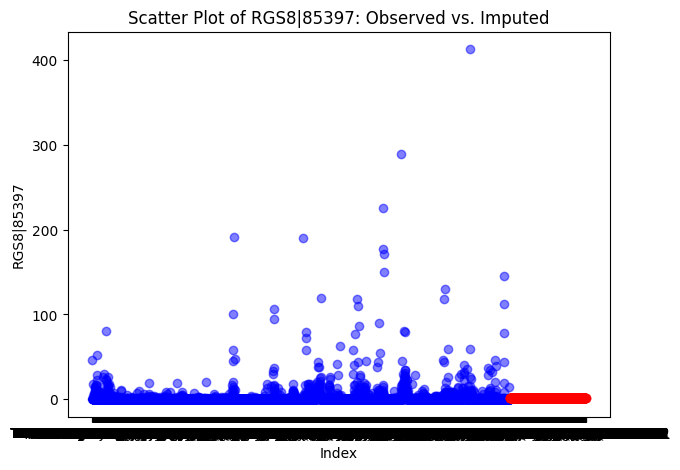

In [ ]:
plt.figure(figsize=(7, 5))

plt.scatter(observed_values.index, observed_values, alpha=0.5, color="blue", label="Observed")
plt.scatter(imputed_values.index, imputed_values, alpha=0.5, color="red", label="MICE Imputed")

plt.xlabel("Index")
plt.ylabel(col)
plt.title(f"Scatter Plot of {col}: Observed vs. Imputed")
plt.show()


While the plot above looks quite strange the x-axis is only showing the index and the rows where the data is being inputted. Clearly the missing data is in the later columns explaining the point sbeing on the far right.

The key area to examine is the height which represets the values - clearly the values being inputted are roughly similar to the majority of the other points and therefore I am satisfied that the MICE inputter is working effectively

## Checking For Duplicates



In [ ]:
duplicates = data_df.duplicated()

print(data_df[duplicates])


Empty DataFrame
Columns: [ACTL6A|86, ADAM9|8754, ADAMTS1|9510, ADCY7|113, AIMP2|7965, ALKBH7|84266, ALOX5AP|241, AMPD3|272, APITD1|378708, APOC1|341, APOE|348, APOO|79135, ARHGAP1|392, ARHGAP15|55843, ARHGDIA|396, ARRB2|409, B2M|567, BCCIP|56647, BRCA2|675, BRIP1|83990, BSG|682, BTK|695, C11orf24|53838, C12orf24|29902, C13orf1|57213, C13orf18|80183, C13orf27|93081, C16orf61|56942, C19orf48|84798, C1orf54|79630, C3AR1|719, C3orf26|84319, CASP1|834, CBX1|10951, CCBL2|56267, CCL2|6347, CCL5|6352, CCRL2|9034, CCT5|22948, CD14|929, CD163|9332, CD19|930, CD247|919, CD33|945, CD37|951, CD3D|915, CD3E|916, CD3G|917, CD44|960, CD48|962, CD52|1043, CD53|963, CD59|966, CD79A|973, CD79B|974, CD84|8832, CD86|942, CD8A|925, CD8B|926, CD97|976, CDCA4|55038, CDH6|1004, CDK2|1017, CECR1|51816, CELF2|10659, CENPJ|55835, CENPN|55839, CENPO|79172, CENPW|387103, CEP78|84131, CHEK1|1111, CKLF|51192, COL16A1|1307, COL1A2|1278, COL3A1|1281, COL6A1|1291, COL6A3|1293, COL8A1|1295, COPS6|10980, COQ2|27235, CORO1

You can see from above that there are no duplicate rows in the dataframe.

During the loading process there were a number of duplicate samples per patient that matched but this was dealt with (as desribed in that section) by taking the first sample from each.

## Analysing my data for outliers

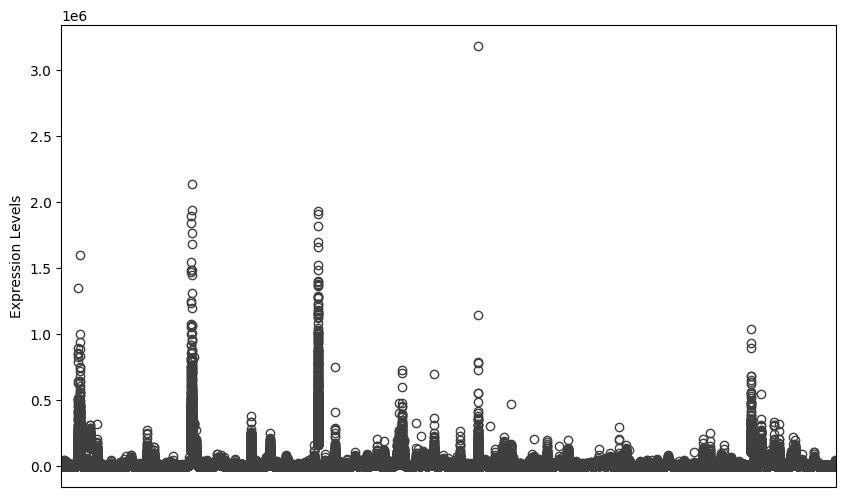

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_df)
plt.xticks([],[])
plt.ylabel("Expression Levels")
plt.show()

Can clearly see from above that there are some severe outliers in the data. However, as this is medical data and each entry is important, clipping is not a suitable alternative.

Using something like MinMax Scaling now and condensing between 0 and 1 would lead to a** severe loss of valuable information** as it is too tight a window to condese the data between.

Therefore I need to find a better way to try condesne the range of the data without losing information from it.

In [ ]:
outlier_value_counts = data_df.columns[(data_df >1e6).any()]
print(outlier_value_counts)

Index(['APOC1|341', 'APOE|348', 'COL1A2|1278', 'COL3A1|1281', 'FN1|2335',
       'LYZ|4069', 'SPARC|6678'],
      dtype='object')


In [ ]:
outlier_value_counts = data_df.columns[(data_df >3e6).any()]
print(outlier_value_counts)

Index(['LYZ|4069'], dtype='object')


In [ ]:
outler_sample = data_df[data_df["LYZ|4069"] > 3e6]
outler_sample["LYZ|4069"]

TCGA-L5-A8NE-ESCA-C1    3.180923e+06
Name: LYZ|4069, dtype: float64

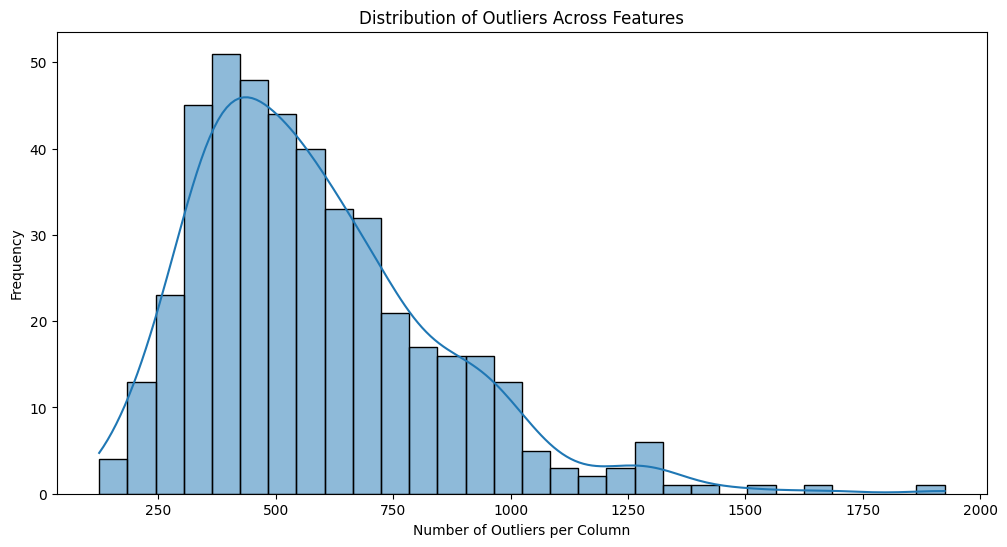

In [ ]:
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data_df < (Q1 - 1.5 * IQR)) | (data_df > (Q3 + 1.5 * IQR))).sum()

# Plot number of outliers per feature
plt.figure(figsize=(12, 6))
sns.histplot(outliers, bins=30, kde=True)
plt.xlabel("Number of Outliers per Column")
plt.ylabel("Frequency")
plt.title("Distribution of Outliers Across Features")
plt.show()


**Main Takeaway**

Cleary there are outliers in the data. However, as this is gene (RNA-Seq) data these outliers could signify rarer conditions or be key indicators to a certain subclass. Therefore I canot simply remove them or cap them.

However, if kept in this current state they will impact performance. Therefore, I want to find a way that reduces their impact without simply remocing them.

My solution which I believe to be best is log transforming the data. This reduces the impact of outliers and also removes the skew as shown below.



## **Examining the Range of Values and Experimenting with Skewness & Log Transformation**

In this step, I analyse the **range of values** in my dataset and explore the impact of **log transformation** on skewness.  

1 **I check skewness** → I identify genes with **high skewness** (absolute value > 1) to determine which features might need transformation.  
2 **I compute the range** → I calculate the **min, max, and range** of values before transformation to understand data spread.  
3 **I apply log transformation** → I shift the data (to ensure all values are positive) and apply **log2** to reduce variance and skewness.  
4 **I compare distributions** →  
   I plot histograms **before and after log transformation** to visualise its effect.  
5 **I re-evaluate skewness** → I check how many genes are now **less skewed** after transformation.  

By doing this, I ensure that my data is **more normally distributed**, which improves performance in **machine learning models** that assume Gaussian-like distributions.


Clearly the data has a quite significant skew - This is very common with RNA-seq data. I wanted to examine the skew in greater deatil

In [ ]:
print(data_df.skew())

non_skewed_genes = data_df.skew().abs() < 1
print(data_df.columns[non_skewed_genes])

ACTL6A|86        3.598747
ADAM9|8754       3.818159
ADAMTS1|9510     4.452365
ADCY7|113        2.932093
AIMP2|7965       1.761730
                  ...    
WNT2B|7482      10.005604
WNT8B|7479      39.371305
WSB2|55884       1.865791
ZWILCH|55055     1.911597
ZYX|7791         2.618897
Length: 440, dtype: float64
Index(['CTNNA1|1495', 'HNRNPR|10236', 'RHOA|387'], dtype='object')


Only 3 columns have a skew under 1 which means that the rest of the data is significantly skewed. In order to deal with this issue along with the outlier issue I looked into a number of approaches.

I experimented with TMM and outlier removal.

However, looking at similar research and my reuslts I steeled with getting the log of the data. This shifted the data , removing the skew, and also as I added the min to each value, this ensure all my data was non-negative.

In [ ]:
import numpy as np

In [ ]:
min_value_before_log = data_df.min().min()
max_value_before_log = data_df.max().max()

print(f"Min value before log transformation: {min_value_before_log}")
print(f"Max value before log transformation: {max_value_before_log}")

gap = max_value_before_log - min_value_before_log
print(f'Range: {gap}')

Min value before log transformation: -0.728763431219938
Max value before log transformation: 3180922.96943738
Range: 3180923.698200811


Can see above that the range was extraordinarily high originally at **3,180,923** but using log below manage to reduce this to **21.6** without losing valuable information

In [ ]:
min_value_before_log = data_df.min().min()

# Here I shift the data such that the minimum value is greater than or equal to 1
data_shifted = data_df - min_value_before_log + 1

# I apply log2 transformation which reduced the variance in my data
data_log = np.log2(data_shifted)

min_value_after_log = data_log.min().min()
max_value_after_log = data_log.max().max()

print(f"Min value after log transformation: {min_value_after_log}")
print(f"Max value after log transformation: {max_value_after_log}")


Min value after log transformation: 0.0
Max value after log transformation: 21.601014788790994


Next I took one of the genes to examine the difference in distributin made by the log transformations

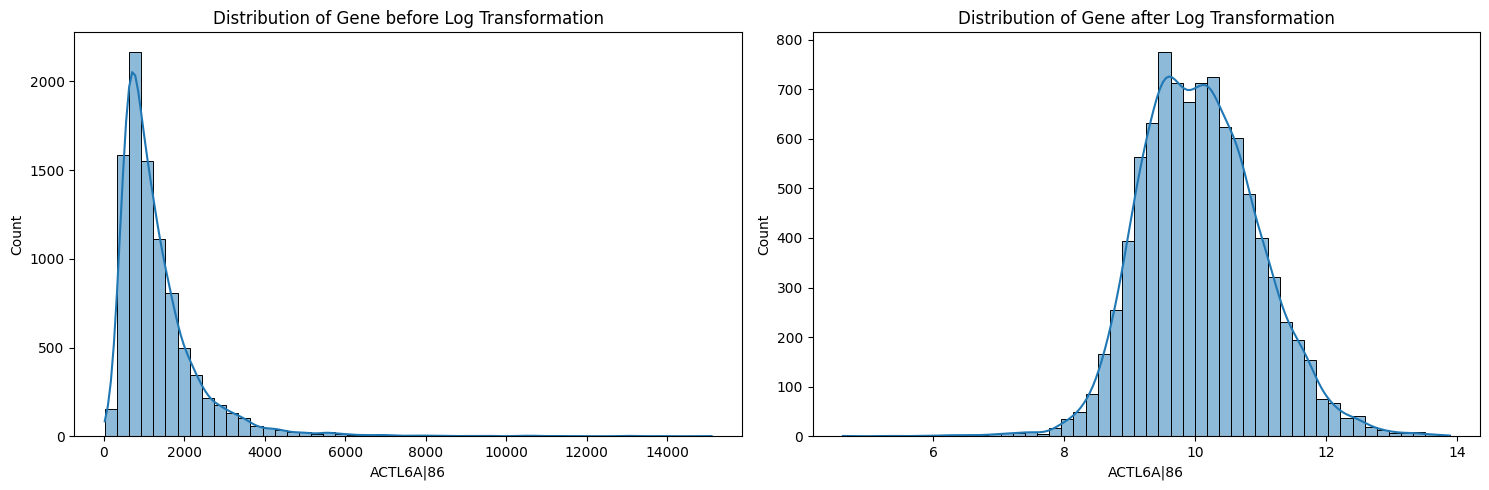

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns for side-by-side plots
plt.figure(figsize=(15, 5))

# First plot: Original gene distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data_df.iloc[:, 0], bins=50, kde=True)
plt.title("Distribution of Gene before Log Transformation")

# Second plot: Log-transformed gene distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data_log.iloc[:, 0], bins=50, kde=True)
plt.title("Distribution of Gene after Log Transformation")

# Show the plots
plt.tight_layout()  # Adjusts subplots to avoid overlap
plt.show()


I can see from the plots above the effect this had on the distrubtion of the gene data. The scale has been reduced significantly and the major skew has been eradicated.

This was an effective method as it did a number of things for my data:

1.   The removal of the skew will help improve accuracy in learning, specifically for SVC which is very dependnet on scale and would struggle when the data has such a wide range
2.   This helps my data for normalisaion as outliers will have less of an impact on normalisation and also training now



In [ ]:
data_log.skew()

ACTL6A|86       0.210690
ADAM9|8754     -0.481403
ADAMTS1|9510    0.032236
ADCY7|113      -0.409615
AIMP2|7965     -0.063146
                  ...   
WNT2B|7482      0.741662
WNT8B|7479      1.793306
WSB2|55884      0.165631
ZWILCH|55055   -0.188167
ZYX|7791       -0.233800
Length: 440, dtype: float64

In [ ]:
print(data_log.skew())

non_skewed_genes = data_log.skew().abs() < 1
print(data_df.columns[non_skewed_genes])

ACTL6A|86       0.210690
ADAM9|8754     -0.481403
ADAMTS1|9510    0.032236
ADCY7|113      -0.409615
AIMP2|7965     -0.063146
                  ...   
WNT2B|7482      0.741662
WNT8B|7479      1.793306
WSB2|55884      0.165631
ZWILCH|55055   -0.188167
ZYX|7791       -0.233800
Length: 440, dtype: float64
Index(['ACTL6A|86', 'ADAM9|8754', 'ADAMTS1|9510', 'ADCY7|113', 'AIMP2|7965',
       'ALKBH7|84266', 'ALOX5AP|241', 'AMPD3|272', 'APITD1|378708',
       'APOC1|341',
       ...
       'VSIG4|11326', 'VTA1|51534', 'WDHD1|11169', 'WDR54|84058',
       'WDR77|79084', 'WIPF1|7456', 'WNT2B|7482', 'WSB2|55884', 'ZWILCH|55055',
       'ZYX|7791'],
      dtype='object', length=426)


Can see now that 426 of the 440 columns have a skew of <|1| which shows that the log has been effective, This has been shown through both my visualistaions and also the above cell

In [ ]:
data_scaled = data_log

**Discusion**

By transforming the data I have achieved the following:

1.   Removed Skewness commonly found in RNA-Seq data
2.   All data is now positive for NMF
3.   The impact of outliers has been reduced as the range has been reduced significantly without losing any key information

All of the above points will help my model achieve better accuracy.




##Now Normalise using MinMax Scaler (Used this in Final Dataset)

Now that I have reduced the impact of outliers and also reduced the skewness of the data, MinMax is actually a solid option. It should work well with the SVC and distance based metrics (I noticed that it did)

**Improved Model Performance:**  
   MinMax scaling ensured that features were within a similar range, which is crucial for models like SVC that rely on distance metrics. This helped my model perform better by reducing the impact of extreme values.

**Scalability and Speed:**  
It also made my dimensionality reduction techniques converge faster and was more computationally efficent. It also allowed for faster parameter tuning and converging of my models as data was in a simlar scale.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)

data_scaled = pd.DataFrame(data_scaled, columns=data_df.columns, index=data_df.index)
print(data_scaled.head())

                     ACTL6A|86  ADAM9|8754  ADAMTS1|9510  ADCY7|113  \
TCGA-02-0047-GBM-C4   0.531466    0.665743      0.348556   0.622689   
TCGA-02-0055-GBM-C4   0.599459    0.775979      0.757180   0.524060   
TCGA-02-2483-GBM-C4   0.640093    0.579606      0.422464   0.507171   
TCGA-02-2485-GBM-C4   0.620332    0.600721      0.516372   0.439057   
TCGA-02-2486-GBM-C4   0.629965    0.608674      0.384767   0.544769   

                     AIMP2|7965  ALKBH7|84266  ALOX5AP|241  AMPD3|272  \
TCGA-02-0047-GBM-C4    0.635676      0.561292     0.764222   0.563144   
TCGA-02-0055-GBM-C4    0.684409      0.636497     0.903191   0.577460   
TCGA-02-2483-GBM-C4    0.743502      0.590916     0.662026   0.490967   
TCGA-02-2485-GBM-C4    0.751130      0.637935     0.588633   0.364077   
TCGA-02-2486-GBM-C4    0.752779      0.618208     0.939022   0.635302   

                     APITD1|378708  APOC1|341  ...  VTA1|51534  WDHD1|11169  \
TCGA-02-0047-GBM-C4       0.490808   0.460407  ...    0

Can see from the plots below that using MinMax Scaler maintains the same distribution as the sclaed data and has not effected the distributions making it a good choice.


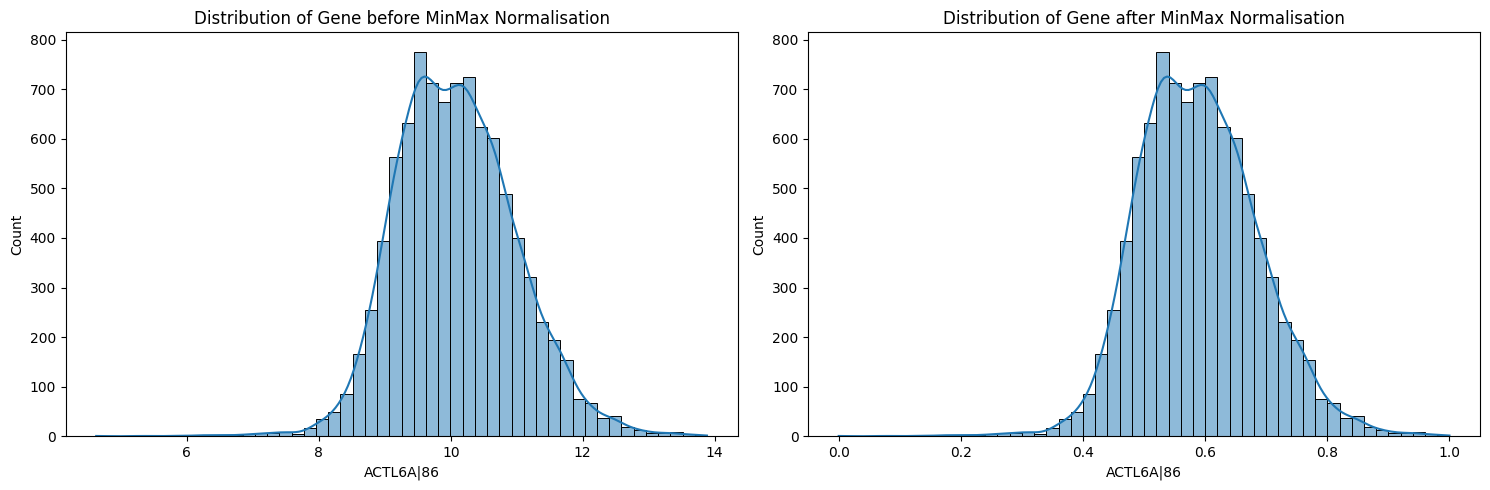

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_log.iloc[:, 0], bins=50, kde=True)
plt.title("Distribution of Gene before MinMax Normalisation")

plt.subplot(1, 2, 2)
sns.histplot(data_scaled.iloc[:, 0], bins=50, kde=True)
plt.title("Distribution of Gene after MinMax Normalisation")

plt.tight_layout()
plt.show()


**Discussion**

While originally MinMax was not a good option due to the large range following the log transformation it became a good option to use.

The smaller range allowed for MinMax to still maintain valuable information

## Compare StandardScaler Normalisation also  (Note: For Classification tasks MinMax was Used)

I applied **StandardScaler** to standardise the data, aiming to bring all features to a mean of 0 and a standard deviation of 1.

After scaling, I shifted the data slightly to ensure all values were positive, for NMF.

The visualization shows the effect of the transformation, improving feature consistency for modeling.

Given the shift and wider range of values I decided to use MinMax for scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_scaled)  # Standardize the data

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=data_df.columns, index=data_df.index)
data_scaled.shape

(9126, 440)

In [ ]:
# Check the range of values after log transformation
min_value_after_z= data_scaled.min().min()
max_value_after_z = data_scaled.max().max()
print(f"Min value after z transformation: {min_value_after_z}")
print(f"Max value after z transformation: {max_value_after_z}")


Min value after z transformation: -16.0068304730067
Max value after z transformation: 9.89416696851123


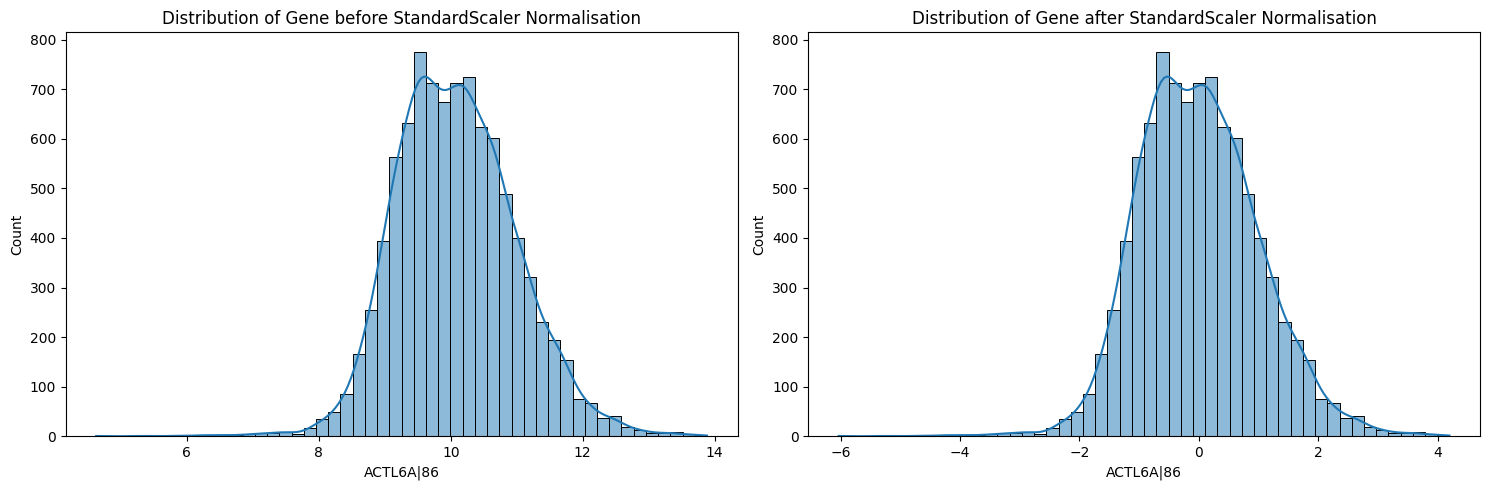

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns for side-by-side plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data_log.iloc[:, 0], bins=50, kde=True)
plt.title("Distribution of Gene before StandardScaler Normalisation")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data_scaled.iloc[:, 0], bins=50, kde=True)
plt.title("Distribution of Gene after StandardScaler Normalisation")

# Show the plots
plt.tight_layout()  # Adjusts subplots to avoid overlap
plt.show()


In [ ]:
min_value = np.min(data_scaled)

# Shift the data to make all values positive
shift_value = abs(min_value) + 1e-6  # Adding a small epsilon to avoid rounding issues
data_scaled = data_scaled + shift_value

# Check the range of values after log transformation
min_value_after_z= data_scaled.min().min()
max_value_after_z = data_scaled.max().max()
print(f"Min value after z transformation: {min_value_after_z}")
print(f"Max value after z transformation: {max_value_after_z}")


Min value after z transformation: 1.0000000010279564e-06
Max value after z transformation: 25.900998441517935


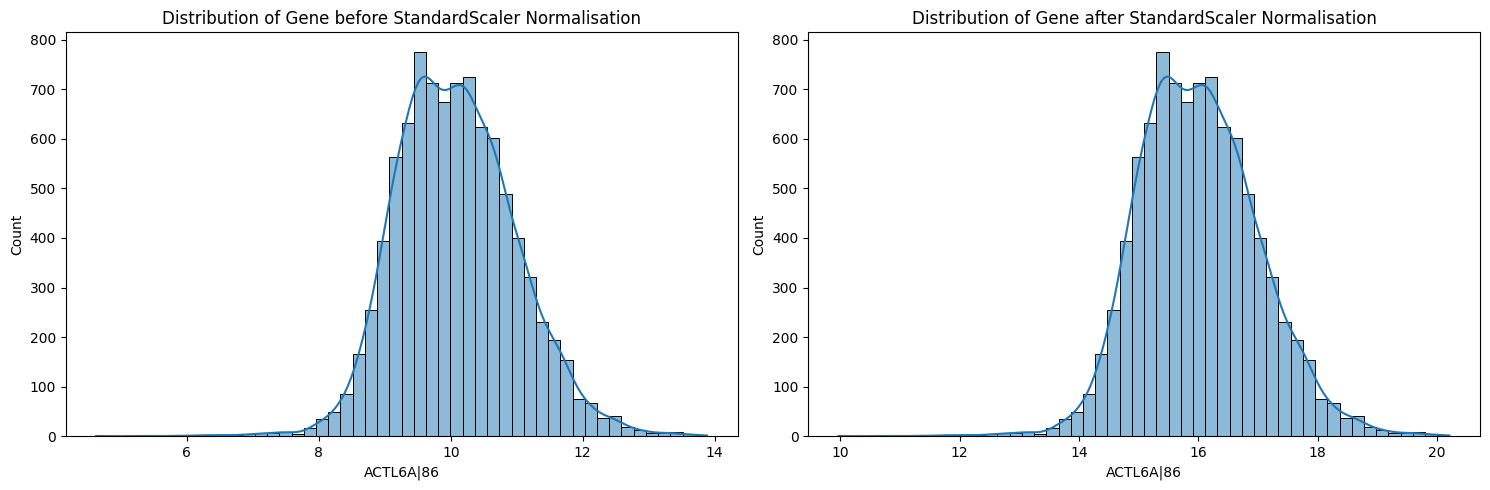

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns for side-by-side plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data_log.iloc[:, 0], bins=50, kde=True)
plt.title("Distribution of Gene before StandardScaler Normalisation")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data_scaled.iloc[:, 0], bins=50, kde=True)
plt.title("Distribution of Gene after StandardScaler Normalisation")

# Show the plots
plt.tight_layout()  # Adjusts subplots to avoid overlap
plt.show()


## Getting the y labels (Cs/Immune Subtypes) in their own column for classification

For classification I needed the Immune Subtypes in their own column.

Currently they are part of the barcode so I need to use `.split()` function to access the subtype value at the end




In [ ]:
data_scaled['Immune_Subtype'] = data_scaled.index.str.split('-').str[-1]

data_scaled = data_scaled[[col for col in data_scaled.columns if col != 'Immune_Subtype'] + ['Immune_Subtype']]

print(data_scaled)


                      ACTL6A|86  ADAM9|8754  ADAMTS1|9510  ADCY7|113  \
TCGA-02-0047-GBM-C4    0.531466    0.665743      0.348556   0.622689   
TCGA-02-0055-GBM-C4    0.599459    0.775979      0.757180   0.524060   
TCGA-02-2483-GBM-C4    0.640093    0.579606      0.422464   0.507171   
TCGA-02-2485-GBM-C4    0.620332    0.600721      0.516372   0.439057   
TCGA-02-2486-GBM-C4    0.629965    0.608674      0.384767   0.544769   
...                         ...         ...           ...        ...   
TCGA-ZS-A9CE-LIHC-C4   0.460642    0.225260      0.276092   0.113991   
TCGA-ZS-A9CF-LIHC-C4   0.548364    0.368574      0.535749   0.300757   
TCGA-ZS-A9CG-LIHC-C3   0.406379    0.452012      0.431869   0.377053   
TCGA-ZU-A8S4-CHOL-C1   0.602438    0.737591      0.443361   0.602344   
TCGA-ZX-AA5X-CESC-C2   0.580465    0.624140      0.465219   0.624600   

                      AIMP2|7965  ALKBH7|84266  ALOX5AP|241  AMPD3|272  \
TCGA-02-0047-GBM-C4     0.635676      0.561292     0.764222  

These counts are consistent with those of the paper

In [ ]:
# Get counts of each immune subtype
subtype_counts = data_scaled['Immune_Subtype'].value_counts()

# Display the counts
print(subtype_counts)


Immune_Subtype
C2    2591
C1    2416
C3    2397
C4    1157
C5     385
C6     180
Name: count, dtype: int64


## Random Selection of 2009 samples using given split of Immune Subtypes

In [ ]:
my_immune_split = {
    'C1': 385,
    'C2': 414,
    'C3': 383,
    'C4': 462,
    'C5': 231,
    'C6': 134
}

# Group my data by 'Immune_Subtype'
grouped_data = data_scaled.groupby('Immune_Subtype')

sampled_data = []

for subtype, count in my_immune_split.items():
    # Here I select my samples for this subtype and sample the required number as stated in my list
    subtype_data = grouped_data.get_group(subtype)
    sampled_subtype_data = subtype_data.sample(n=count, random_state=40446925) # Use my student number as random seed to keep same split

    sampled_data.append(sampled_subtype_data)

final_data = pd.concat(sampled_data)

final_data = final_data.sort_index()

print(final_data.head())
print(final_data.shape)


                      ACTL6A|86  ADAM9|8754  ADAMTS1|9510  ADCY7|113  \
TCGA-02-2483-GBM-C4    0.640093    0.579606      0.422464   0.507171   
TCGA-04-1514-OV-C2     0.787759    0.425446      0.572037   0.620007   
TCGA-04-1519-OV-C4     0.595116    0.504953      0.641347   0.439104   
TCGA-05-4244-LUAD-C4   0.600592    0.625537      0.326555   0.644429   
TCGA-05-4382-LUAD-C6   0.655586    0.840379      0.468388   0.702347   

                      AIMP2|7965  ALKBH7|84266  ALOX5AP|241  AMPD3|272  \
TCGA-02-2483-GBM-C4     0.743502      0.590916     0.662026   0.490967   
TCGA-04-1514-OV-C2      0.668315      0.680294     0.248621   0.477207   
TCGA-04-1519-OV-C4      0.773801      0.652869     0.413965   0.401224   
TCGA-05-4244-LUAD-C4    0.728643      0.543489     0.822339   0.598164   
TCGA-05-4382-LUAD-C6    0.680218      0.514672     0.766014   0.700198   

                      APITD1|378708  APOC1|341  ...  WDHD1|11169  WDR54|84058  \
TCGA-02-2483-GBM-C4        0.603607   0.5

In [ ]:
final_data

ACTL6A|86  ADAM9|8754  ADAMTS1|9510  ADCY7|113  \
TCGA-02-2483-GBM-C4    0.640093    0.579606      0.422464   0.507171   
TCGA-04-1514-OV-C2     0.787759    0.425446      0.572037   0.620007   
TCGA-04-1519-OV-C4     0.595116    0.504953      0.641347   0.439104   
TCGA-05-4244-LUAD-C4   0.600592    0.625537      0.326555   0.644429   
TCGA-05-4382-LUAD-C6   0.655586    0.840379      0.468388   0.702347   
...                         ...         ...           ...        ...   
TCGA-ZM-AA0D-TGCT-C2   0.658953    0.288495      0.242040   0.676698   
TCGA-ZN-A9VO-MESO-C2   0.617962    0.541368      0.461879   0.622768   
TCGA-ZN-A9VW-MESO-C6   0.583639    0.836329      0.420672   0.687734   
TCGA-ZR-A9CJ-ESCA-C1   0.612177    0.734814      0.590260   0.670524   
TCGA-ZS-A9CF-LIHC-C4   0.548364    0.368574      0.535749   0.300757   

                      AIMP2|7965  ALKBH7|84266  ALOX5AP|241  AMPD3|272  \
TCGA-02-2483-GBM-C4     0.743502      0.590916     0.662026   0.490967   
TCGA-04-1514-OV-C2      0.668315      0.680294     0.248621   0.477207   
TCGA-04-1519-OV-C4      0.773801      0.652869     0.413965   0.401224   
TCGA-05-4244-LUAD-C4    0.728643      0.543489     0.822339   0.598164   
TCGA-05-4382-LUAD-C6    0.680218      0.514672     0.766014   0.700198   
...                          ...           ...          ...        ...   
TCGA-ZM-AA0D-TGCT-C2    0.648887      0.595950     0.442551   0.653505   
TCGA-ZN-A9VO-MESO-C2    0.705511      0.728892     0.600837   0.555939   
TCGA-ZN-A9VW-MESO-C6    0.628490      0.585110     0.634564   0.526362   
TCGA-ZR-A9CJ-ESCA-C1    0.677655      0.483287     0.583528   0.524509   
TCGA-ZS-A9CF-LIHC-C4    0.669160      0.751678     0.375825   0.305085   

                      APITD1|378708  APOC1|341  ...  WDHD1|11169  WDR54|84058  \
TCGA-02-2483-GBM-C4        0.603607   0.533888  ...     0.534099     0.673128   
TCGA-04-1514-OV-C2         0.631377   0.233894  ...     0.679134     0.768444   
TCGA-04-1519-OV-C4         0.516358   0.305942  ...     0.526694     0.676118   
TCGA-05-4244-LUAD-C4       0.492477   0.529061  ...     0.574494     0.660358   
TCGA-05-4382-LUAD-C6       0.538134   0.532223  ...     0.561330     0.565823   
...                             ...        ...  ...          ...          ...   
TCGA-ZM-AA0D-TGCT-C2       0.805949   0.638298  ...     0.588944     0.637997   
TCGA-ZN-A9VO-MESO-C2       0.576756   0.469798  ...     0.431234     0.633980   
TCGA-ZN-A9VW-MESO-C6       0.357565   0.481353  ...     0.630467     0.622479   
TCGA-ZR-A9CJ-ESCA-C1       0.676557   0.378679  ...     0.678453     0.663039   
TCGA-ZS-A9CF-LIHC-C4       0.597574   0.753767  ...     0.450327     0.355678   

                      WDR77|79084  WIPF1|7456  WNT2B|7482  WNT8B|7479  \
TCGA-02-2483-GBM-C4      0.534688    0.601255    0.234073    0.096332   
TCGA-04-1514-OV-C2       0.500579    0.479200    0.564349    0.527590   
TCGA-04-1519-OV-C4       0.633463    0.342353    0.522627    0.147051   
TCGA-05-4244-LUAD-C4     0.299864    0.557411    0.290275    0.087507   
TCGA-05-4382-LUAD-C6     0.379918    0.750912    0.315966    0.115684   
...                           ...         ...         ...         ...   
TCGA-ZM-AA0D-TGCT-C2     0.499183    0.843517    0.721594    0.078174   
TCGA-ZN-A9VO-MESO-C2     0.325557    0.720264    0.784802    0.089563   
TCGA-ZN-A9VW-MESO-C6     0.340610    0.698030    0.882996    0.064158   
TCGA-ZR-A9CJ-ESCA-C1     0.475249    0.600873    0.282246    0.151876   
TCGA-ZS-A9CF-LIHC-C4     0.296841    0.455550    0.148455    0.086953   

                      WSB2|55884  ZWILCH|55055  ZYX|7791  Immune_Subtype  
TCGA-02-2483-GBM-C4     0.694914      0.623585  0.622818              C4  
TCGA-04-1514-OV-C2      0.389518      0.603476  0.562552              C2  
TCGA-04-1519-OV-C4      0.276029      0.436331  0.740409              C4  
TCGA-05-4244-LUAD-C4    0.526862      0.421235  0.522010              C4  
TCGA-05-4382-LUAD-C6    0.467192      0.540

In [ ]:
immune_subtype_counts = final_data['Immune_Subtype'].value_counts()

my_desired_order = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# Reorder the counts based on the predefined order
sorted_counts = immune_subtype_counts.reindex(my_desired_order)

# Display the sorted counts
print(sorted_counts)



Immune_Subtype
C1    385
C2    414
C3    383
C4    462
C5    231
C6    134
Name: count, dtype: int64


In [ ]:
file_path = '/content/drive/MyDrive/Queens/Module6/Final2009.csv'

final_data.to_csv(file_path, index=True)
print(f"matched_df has been saved as '{file_path}'.")

matched_df has been saved as '/content/drive/MyDrive/Queens/Module6/Final2009.csv'.


# Section 3 Classification

## Loading in my 2009 X 440 Dataset

Note that this cuurently has shape 2009 x 441 as the final column holds the immune subtype category label

In [2]:
final_data = pd.read_csv('/content/drive/MyDrive/Queens/Module6/Final2009.csv', index_col=0)
print(final_data.head())
print(final_data.shape)


                      ACTL6A|86  ADAM9|8754  ADAMTS1|9510  ADCY7|113  \
TCGA-02-2483-GBM-C4    0.640093    0.579606      0.422464   0.507171   
TCGA-04-1514-OV-C2     0.787759    0.425446      0.572037   0.620007   
TCGA-04-1519-OV-C4     0.595116    0.504953      0.641347   0.439104   
TCGA-05-4244-LUAD-C4   0.600592    0.625537      0.326555   0.644429   
TCGA-05-4382-LUAD-C6   0.655586    0.840379      0.468388   0.702347   

                      AIMP2|7965  ALKBH7|84266  ALOX5AP|241  AMPD3|272  \
TCGA-02-2483-GBM-C4     0.743502      0.590916     0.662026   0.490967   
TCGA-04-1514-OV-C2      0.668315      0.680294     0.248621   0.477207   
TCGA-04-1519-OV-C4      0.773801      0.652869     0.413965   0.401224   
TCGA-05-4244-LUAD-C4    0.728643      0.543489     0.822339   0.598164   
TCGA-05-4382-LUAD-C6    0.680218      0.514672     0.766014   0.700198   

                      APITD1|378708  APOC1|341  ...  WDHD1|11169  WDR54|84058  \
TCGA-02-2483-GBM-C4        0.603607   0.5

## NMF

In [ ]:
from sklearn.decomposition import NMF
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# Extract the features (excluding 'Immune_Subtype')
X_scaled = final_data.drop('Immune_Subtype', axis=1)

# Keep the original index intact
X_scaled.index = final_data.index  # Preserve the index

# Initialize NMF with 5 components
n_components = 25
nmf = NMF(n_components=n_components, init='nndsvd', random_state=40446925)#

y = final_data['Immune_Subtype']  # Target: Immune Subtypes



In [ ]:
# Apply NMF to the data
W = nmf.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
H = nmf.components_

In [ ]:
print(W.shape)
H.shape

(2009, 25)


(25, 440)

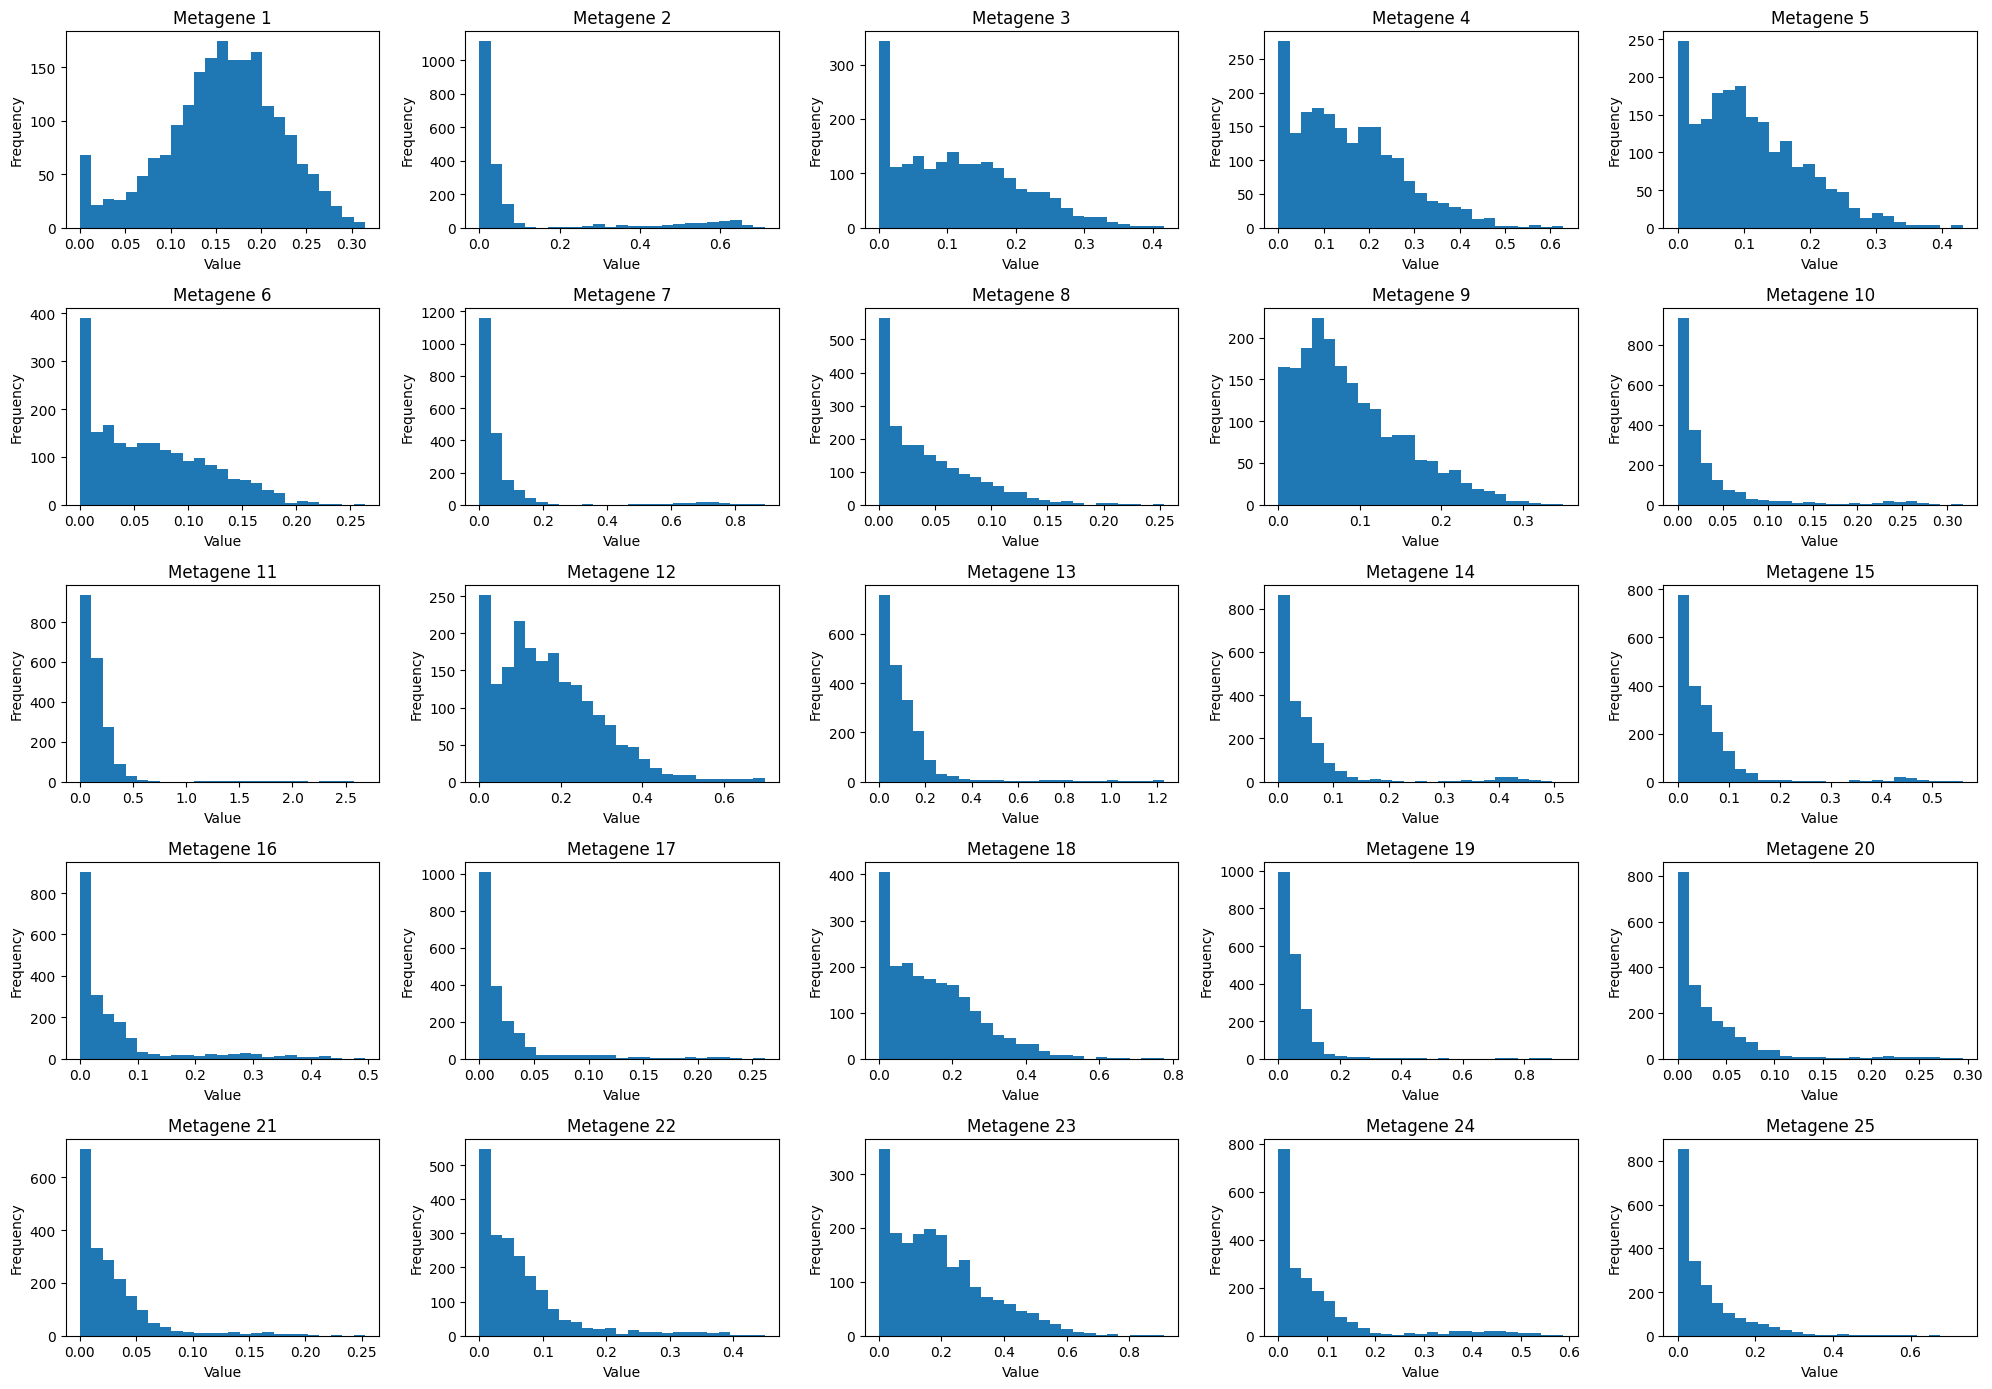

In [ ]:
num_bins = 25
num_features = W.shape[1]
num_rows = 5
num_cols = 5

fig, axis = plt.subplots(num_rows, num_cols, figsize=(20, 14))
axis = axis.ravel()  # Flatten the axis array

# Loop over columns of W and create histograms
for i in range(num_features):
    axis[i].hist(W[:, i], bins=num_bins)
    axis[i].set_title(f'Metagene {i+1}')
    axis[i].set_xlabel("Value")
    axis[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



###Analysing Optimal Rank

Takes around 5 Mins

I chose NNDSVD for NMF initialisation because ituses SVD as a starting point. This approach is particularly suited for my RNA seq data, which is often high-dimensional and sparse. NNDSVD ensures faster convergence and improved interpretability compared to random.

I struggled with finding the best way to select the rank for NMF. I ended up using mainly trial and error but then attempte to chose using a plot ofthe reconstruction error to analyse where the error stops decreasing drastically.The error is caculated by subtracting the dor product of the W and H matrices from the original matrix (https://medium.com/@ronanodonnell43/dimensionality-reduction-part-3-non-negative-matrix-factorisation-nmf-0b716caeeb14).

This didnt provide much insight but I did notice that after 25 error began decreasing slower so therefore tested this and it did provdide the best reuslts.

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

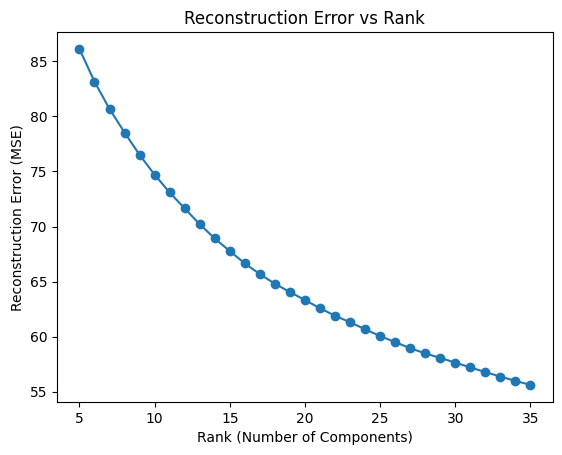

Optimal rank: 35


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

ranks = range(5, 36)  # Trying ranks from 1 to 50
errors = []

for rank in ranks:
    nmf = NMF(n_components=rank, init='nndsvd', random_state=40446925,max_iter=1000)#verbose=1)#
    W = nmf.fit_transform(X_scaled)  # Fit NMF model
    H = nmf.components_         # Get factorized components
    reconstruction_error = np.linalg.norm(X_scaled - np.dot(W, H), 'fro')
    errors.append(reconstruction_error)

# Plot the reconstruction error vs. rank
plt.plot(ranks, errors, marker='o')
plt.xlabel('Rank (Number of Components)')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error vs Rank')
plt.show()

# Find the rank with the minimal error
optimal_rank = ranks[np.argmin(errors)]
print(f"Optimal rank: {optimal_rank}")


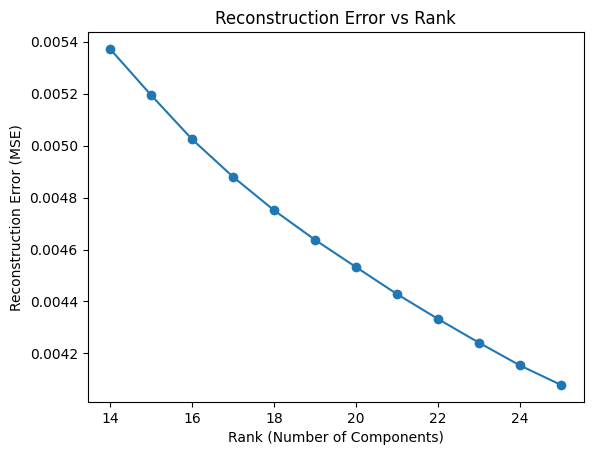

Optimal rank: 25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

ranks = range(14, 26)  # Trying ranks from 1 to 50
errors = []

for rank in ranks:
    nmf = NMF(n_components=rank, init='nndsvd', random_state=40446925,max_iter=10000)#verbose=1)#
    W = nmf.fit_transform(X_scaled)  # Fit NMF model
    H = nmf.components_         # Get factorized components
    reconstructed_data = np.dot(W, H)  # Reconstructed matrix
    error = mean_squared_error(X_scaled, reconstructed_data)  # Compute reconstruction error
    errors.append(error)

# Plot the reconstruction error vs. rank
plt.plot(ranks, errors, marker='o')
plt.xlabel('Rank (Number of Components)')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error vs Rank')
plt.show()

# Find the rank with the minimal error
optimal_rank = ranks[np.argmin(errors)]
print(f"Optimal rank: {optimal_rank}")


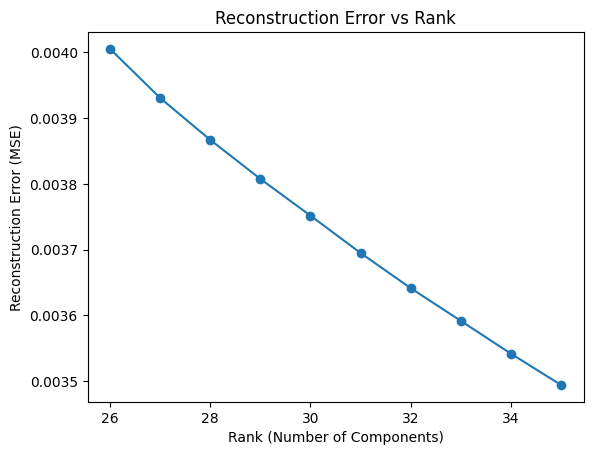

Optimal rank: 35


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

ranks = range(26, 36)  # Trying ranks from 1 to 50
errors = []

for rank in ranks:
    nmf = NMF(n_components=rank, init='nndsvd', random_state=40446925,max_iter=10000)#verbose=1)#
    W = nmf.fit_transform(X_scaled)  # Fit NMF model
    H = nmf.components_         # Get factorized components
    reconstructed_data = np.dot(W, H)  # Reconstructed matrix
    error = mean_squared_error(X_scaled, reconstructed_data)  # Compute reconstruction error
    errors.append(error)

# Plot the reconstruction error vs. rank
plt.plot(ranks, errors, marker='o')
plt.xlabel('Rank (Number of Components)')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error vs Rank')
plt.show()

# Find the rank with the minimal error
optimal_rank = ranks[np.argmin(errors)]
print(f"Optimal rank: {optimal_rank}")


In [ ]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# Extract the features (excluding 'Immune_Subtype')
X_scaled = final_data.drop('Immune_Subtype', axis=1)

# Keep the original index intact
X_scaled.index = final_data.index  # Preserve the index

# Initialize NMF with 5 components
n_components = 25
nmf = NMF(n_components=n_components, init='nndsvd', random_state=40446925)#

y = final_data['Immune_Subtype']  # Target: Immune Subtypes

# Apply NMF to the data
W = nmf.fit_transform(X_scaled)

H = nmf.components_

print("Shape of W:", W.shape)
print("Shape of H:", H.shape)

Shape of W: (2009, 25)
Shape of H: (25, 440)


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


##PCA and Analysing optimal PCA components

After analysing the results of NMF and finding it did not perform as expected, I decided to explore PCA as a dimensionality reduction technique. PCA may perform better on the log-transformed and min-max scaled data, as it helps identify linear patterns and preserves variance in the data.

Steps Taken below:

Explained Variance: I caluclate and plot the cumulative variance to determine how many components to keep (75% variance threshold).

Optimal Components: Selected 20 components to retain significant information.

Data Transformation: Applied PCA and transformed the features to metagenes.


In [3]:
X_scaled = final_data.drop('Immune_Subtype', axis=1)
y = final_data['Immune_Subtype']

X_scaled.index = final_data.index

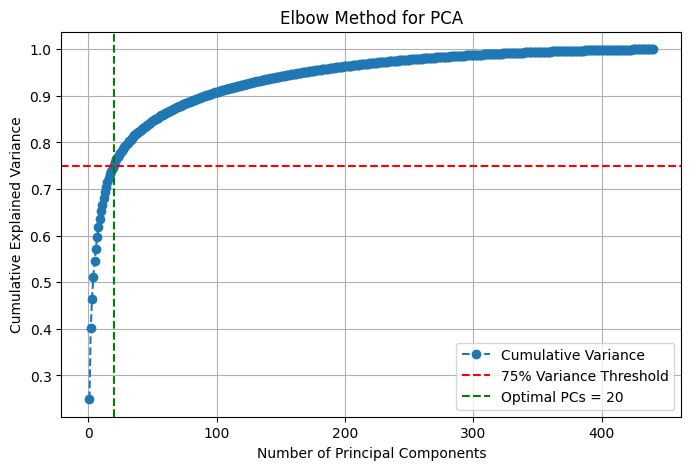

Optimal number of PCs for 85% variance: 20


In [6]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components explaining at least 85% variance
n_components_75 = np.argmax(cumulative_variance >= 0.75) + 1

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance')

# Add a red horizontal line at 85% variance
plt.axhline(y=0.75, color='red', linestyle='--', label='75% Variance Threshold')

# Add a vertical line at the optimal number of components
plt.axvline(x=n_components_75, color='green', linestyle='--', label=f'Optimal PCs = {n_components_75}')

# Labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for PCA')
plt.legend()
plt.grid()
plt.show()

# Print the optimal number of components
print(f"Optimal number of PCs for 85% variance: {n_components_75}")


In [7]:
n_components = 20

# Perform PCA
pca = PCA(n_components=n_components)
W = pca.fit_transform(X_scaled)

# Create column names dynamically
pc_columns = [f'PC{i+1}' for i in range(n_components)]

# Create DataFrame with principal components
pca_df = pd.DataFrame(data=W, columns=pc_columns)
pca_df['Type'] = y  # Add target variable for visualization

# Print explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f'Explained variance by each principal component:\n{explained_variance}')
print(f'Cumulative explained variance:\n{cumulative_variance}')
print(f'Total explained variance: {cumulative_variance[-1]:.4f}')


Explained variance by each principal component:
[0.2489442  0.1528237  0.06233834 0.04647653 0.03451278 0.02708141
 0.02427828 0.02210006 0.0175089  0.01588233 0.01484136 0.01365688
 0.01325596 0.01166743 0.00956586 0.00903298 0.00784158 0.00706007
 0.006864   0.00639754]
Cumulative explained variance:
[0.2489442  0.4017679  0.46410623 0.51058277 0.54509554 0.57217696
 0.59645524 0.6185553  0.6360642  0.65194653 0.6667879  0.68044478
 0.69370074 0.70536816 0.71493403 0.72396701 0.73180859 0.73886866
 0.74573266 0.7521302 ]
Total explained variance: 0.7521


### Discussion

I made a number of observations about the number of components needed to achieve certain variance levels.

I experimented with a number of different thresholds but found that 20 (75%) provided the models with the best information without prpoviding too much noise.

At 80% 53 features were needed which was leading to overfitting and was also worsening performance. This showed that after the 75% the PCA was struggling to captre relevant components or more complex patterns

At 70% 14 features were needed but this was leading to underfitting of the models as there was not enough valuable information in the componets.

Therefore 20 components proved the best tradeoff between overfitting and performance.

# Classifiction Using PCA (My Main Models are found in here)

In this section I used the following steps:

1. I split the data into a 80/20 training, testing split resulting in 1607 training samples and 402 testing samples. I used `Stratify = y` to ensure a somewhat even split in the test set across all samples to try tackle the class imbalance as this ensures that the training and test sets maintain the same class distribution as the original dataset.

2. I then implemented some baseline testing for my three chosen model types **Support Vector Classifier (SVC) **, **Random Forest** and **Gradient Boosting**. My reasons for these models can be found in the Baseline Testing Section.

3. I then used Gridsearch CV to hypertune the parameters through cross validation and printed out and examined the best parameters.

4. Experimented with best hyperparameters from an accuracy point but also from a fit point of view (in an attempt to examine the bias-variance tradeoff) and examine the effect this has on overfitting.

5. Also looked at using bootstrapping and KFold Cross Validation techniques.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(W, y, test_size=0.2, stratify= y, random_state=40446925)

In [9]:
print(X_train)

[[-1.43181645e+00 -7.48575520e-01 -1.10690631e+00 ... -1.50512125e-01
   4.25715242e-02 -1.97759173e-01]
 [-1.04171882e+00  6.28680720e-01 -8.43090223e-01 ...  4.63020603e-01
   5.56587254e-02 -7.07954939e-02]
 [-1.16283782e+00  2.54361819e+00  8.98216358e-01 ...  5.10151215e-02
   1.43568213e-01 -3.35985480e-02]
 ...
 [-1.26659741e+00 -6.24145020e-02 -8.71335555e-01 ...  4.59722621e-01
  -1.05140896e-01  2.38507614e-03]
 [-1.00946978e+00  4.48793403e-01 -8.78505331e-01 ...  2.34496743e-01
   1.31204079e-02  7.69785128e-02]
 [-2.74070111e+00  1.62388988e+00  5.29353031e-01 ...  2.25341464e-02
  -1.23369097e-01 -8.01239761e-02]]


In [10]:
print(X_test)

[[-1.8735597  -1.90074085  0.42272266 ...  0.2532222   0.43287703
   0.11593729]
 [-0.72535583  1.86499511  0.81225116 ... -0.03490052 -0.06305681
  -0.09929282]
 [-0.54170709 -0.313353   -0.99813584 ...  0.47332055 -0.23436155
   0.02814308]
 ...
 [ 1.57373041  0.79235172 -0.49310727 ...  0.17591641 -0.22523705
   0.35808609]
 [-1.31432062 -1.09404938 -0.83632262 ... -0.1463626   0.07454528
   0.13769472]
 [ 1.54741629  0.90439927 -0.63979279 ...  0.03418229  0.04871876
  -0.01436495]]


In [11]:
print(y_train)

TCGA-EM-A3ST-THCA-C3    C3
TCGA-QR-A706-PCPG-C3    C3
TCGA-FG-6691-LGG-C5     C5
TCGA-DD-AACS-LIHC-C4    C4
TCGA-AZ-4308-COAD-C1    C1
                        ..
TCGA-AA-3973-COAD-C3    C3
TCGA-DX-A2J1-SARC-C6    C6
TCGA-SR-A6MR-PCPG-C3    C3
TCGA-SP-A6QJ-PCPG-C4    C4
TCGA-P5-A5F2-LGG-C5     C5
Name: Immune_Subtype, Length: 1607, dtype: object


In [12]:
print(y_test)

TCGA-25-1871-OV-C1      C1
TCGA-HT-7690-LGG-C4     C4
TCGA-78-7156-LUAD-C3    C3
TCGA-AX-A2HK-UCEC-C2    C2
TCGA-CV-7406-HNSC-C1    C1
                        ..
TCGA-DH-A66D-LGG-C5     C5
TCGA-77-A5G8-LUSC-C1    C1
TCGA-05-4433-LUAD-C3    C3
TCGA-XR-A8TC-LIHC-C4    C4
TCGA-E2-A3DX-BRCA-C3    C3
Name: Immune_Subtype, Length: 402, dtype: object


In [ ]:
print(f'The shape of training data {X_train.shape}')
print(f'The shape of testing data {X_test.shape}')
print(f'The shape of training labels {y_train.shape}')
print(f'The shape of testing labels {y_test.shape}')

The shape of training data (1607, 20)
The shape of testing data (402, 20)
The shape of training labels (1607,)
The shape of testing labels (402,)


Can see below that the test set has a similar distribution to the original dataset for immune subtypes

In [ ]:
print(y_test.value_counts())


Immune_Subtype
C4    92
C2    83
C1    77
C3    77
C5    46
C6    27
Name: count, dtype: int64


## Baseline Testing

For predicting the immune subtype labels, I chose a **diverse set of machine learning models** to capture different types of patterns in the data.

To ensure a balanced approach, I used:
- **Random Forest (RF)**: A tree-based ensemble method.
- **Support Vector Machine (SVC)**: A kernel-based method.
- **Gradient Boosting (GB)**: A boosting-based ensemble method.

Each model has unique strengths, allowing me to compare a number of approahces to ensure the best possible model. Below are the models I chose and my reasons behind chossing them

### 1. **Random Forest Classifier**

- **Handles complex interactions well**: It can model nonlinear relationships.
- **Robust to noise**: As this is RNA-seq data,there can be a lot variability and noise in the data so this could be useful.
- **Feature importance**: Random Forest uses a rank which could be useful for identifying key metagenes.

### **Hyperparameters Chosen**
- `random_state=40446925`: Ensures reproducibility for me.
- I chose to use **Default hyperparameters** initially because Random Forest performs well out of the box with minimal tuning.

### 2. **Support Vector Classifier**

- **Effective for high-dimensional data**: Even with my PCA-reduced features, SVMs can find complex decision boundaries.
- **Kernel trick**: This allows for flexibility in capturing nonlinear patterns.
- **Sensitive to feature scaling**: As I used such careful preprocessing the distance based calculations of SVC could be beneficial now for insights.
- **Works well with smaller datasets**: Unlike more complex models, SVMs can be effectivewhen the number of samples is relatively limited.

### **Hyperparameters Chosen**
- `kernel="rbf"`: The radial basis function (RBF) kernel is well-suited for non-linearly separable data.
- `C=1`: I set this low to prevent overfitting.
- `gamma=1`: I set this value quit e high as it controls the influence of a single training example, making the model more flexible.

By chosing this parameters I can get an overall feel for how the model performs at a relatively underfitted setting.

### **3.Gradient Boosting Classifier**

- **Sequential learning**: Learns from mistakes of previous models.
- **Good generalisation**: Can perform well with fewer features after PCA.
- **Robust to noise**: Less prone to overfitting than individual decision trees so want to see if it can outperform RF.

### **Hyperparameters Chosen**
- **Default hyperparameters** were chosen initially because Gradient Boosting can be sensitive to tuning, and starting with defaults allows for a baseline comparison before adjusting parameters. By chosing certain parameters I could be setting an unrealistic performance.

---

## **Conclusion**
By using a **combination of tree-based, kernel-based, and boosting models**, I ensure that different learning approaches are evaluated.


In [ ]:
rf_classifier = RandomForestClassifier(random_state=40446925)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.8284
Classification Report:
              precision    recall  f1-score   support

          C1       0.78      0.90      0.84        77
          C2       0.86      0.81      0.83        83
          C3       0.81      0.83      0.82        77
          C4       0.82      0.78      0.80        92
          C5       0.96      0.98      0.97        46
          C6       0.73      0.59      0.65        27

    accuracy                           0.83       402
   macro avg       0.83      0.81      0.82       402
weighted avg       0.83      0.83      0.83       402



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svc_model = SVC(kernel="rbf",C=1,gamma=1,random_state=40446925)

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.8159
Classification Report:
              precision    recall  f1-score   support

          C1       0.82      0.78      0.80        77
          C2       0.87      0.82      0.84        83
          C3       0.86      0.71      0.78        77
          C4       0.71      0.90      0.79        92
          C5       0.98      0.93      0.96        46
          C6       0.73      0.70      0.72        27

    accuracy                           0.82       402
   macro avg       0.83      0.81      0.82       402
weighted avg       0.83      0.82      0.82       402



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

gb_classifier = GradientBoostingClassifier(random_state=40446925)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.8209
Classification Report:
              precision    recall  f1-score   support

          C1       0.81      0.84      0.83        77
          C2       0.91      0.75      0.82        83
          C3       0.79      0.83      0.81        77
          C4       0.78      0.86      0.82        92
          C5       0.98      0.93      0.96        46
          C6       0.61      0.63      0.62        27

    accuracy                           0.82       402
   macro avg       0.81      0.81      0.81       402
weighted avg       0.83      0.82      0.82       402



### Discussion of Results

Interestingly, Random Forest outperforms Gradient Boosting. This could be due to the relatively small dataset and the fact that Random Forest averages across multiple trees rather than building them sequentially, which makes it more robust to overfitting and generally more stable in performance.

However, while SVC had the lowest pure accuracy score, this was with quite safe parameters, meaning its true potential wasn't fully realised. Despite this, SVC showed the most balanced performance across all evaluation metrics, suggesting it may generalise better with proper tuning. Since SVC is particularly sensitive to hyperparameters like C and gamma, I think further optimisation could significantly improve its performance.

Therefore I will carry SVC forward into the next stage of testing alongside Random Forest for hyperparameter tuning, as both models have shown promise in different ways.

## Grid Search Cross-Validation for Hyperparameter Tuning

After baseline testing, I performed Grid Search Cross-Validation to optimize the SVC model. The hyperparameters tuned were:

1.   C: Regularisation parameter to try find balance between under and over fitting
2.   Gamma: Influence of a single training example

I tested a range of values for both parameters and optimised for accuracy.

To visualise the Grid CV results, I plotted a heatmap showing the mean test scores across different C and gamma values. This helps identify the most effective parameter combinations.

I also plotted a table showing the mean test and training scores so that I could find the parameters that limited the difference between them to prevent overfitting

Random Forest Tuning

The same process was carried out for RF but the hyperparameters tuned were

1.   n_estimators: Number of trees in the forest.
2.   max_depth: Maximum depth of each tree.
3.   min_samples_split: Minimum samples required to split an internal node.
4.   bootstrap: Whether bootstrap samples are used when building trees.



##SVC

For the Grid search I decided to set the range of C values between 1 and 9.
This parameter is in charge of regularisation so by setting a wde variety of C values I can find the best balance between underfitting and overfitting. A small C results in a higher bias, leading to a simpler model, while a larger C allows my model to fit the data more closely, reducing bias but increasing variance.

For gamma I included values [10, 1, 0.1, 0.01, 0.001]. A higher gamma makes the model more sensitive to individual points, capturing fine details but risking overfitting. A lower gamma (e.g., 0.001) results in a smoother decision boundary, reducing sensitivity to noise but potentially underfitting. By testing a range of values, I ensure that the model generalises well to unseen data.

I chose the ‘rbf’ kernel because it is effective for capturing complex relationships in the data.

I also used 10-fold cross-validation (cv=10) to evaluate the model across multiple data splits to make sure I get a reliable evaluation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
params = [{
    "C": [1,2,3,4,5,6,7,8,9],
    "gamma": [10,1,0.1,0.01,0.001],
    "kernel": ['rbf']
}]

grid_search = GridSearchCV(svc_model, params, cv=10, scoring="accuracy",return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(C=1, gamma=1, random_state=40446925),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': [10, 1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

Can see below that C=5 and gamma =0.1 are the best parameters. These values make sense to me as they are both with the middle of the possible values, showing that they offer the best solution between overfitting and underfitting

In [ ]:
print(grid_search.best_params_)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
0.8543555900621118
SVC(C=5, gamma=0.1, random_state=40446925)


Can see below the printed table of the results of each iteration in the GridSearch ordered by performance.

In [ ]:
grid_results_df_pca= pd.DataFrame(grid_search.cv_results_)
print(grid_results_df_pca[["params","mean_train_score","mean_test_score","rank_test_score"]].sort_values(by="rank_test_score"))

                                       params  mean_train_score  \
22    {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}          0.931411   
17    {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}          0.923460   
37    {'C': 8, 'gamma': 0.1, 'kernel': 'rbf'}          0.948558   
42    {'C': 9, 'gamma': 0.1, 'kernel': 'rbf'}          0.952776   
32    {'C': 7, 'gamma': 0.1, 'kernel': 'rbf'}          0.944755   
27    {'C': 6, 'gamma': 0.1, 'kernel': 'rbf'}          0.938740   
7     {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}          0.900920   
12    {'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}          0.912881   
2     {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}          0.876789   
38   {'C': 8, 'gamma': 0.01, 'kernel': 'rbf'}          0.852934   
33   {'C': 7, 'gamma': 0.01, 'kernel': 'rbf'}          0.849339   
28   {'C': 6, 'gamma': 0.01, 'kernel': 'rbf'}          0.845536   
43   {'C': 9, 'gamma': 0.01, 'kernel': 'rbf'}          0.854594   
13   {'C': 3, 'gamma': 0.01, 'kernel': 'rbf'}          0.83080

Down below is a heatmap of my results across the different gamma and C values. It is clear that gamma = 0.1 offers the best results with various C values reporting similar results. However, C=5 is still clearly the best hyperparamter and the one I will be using

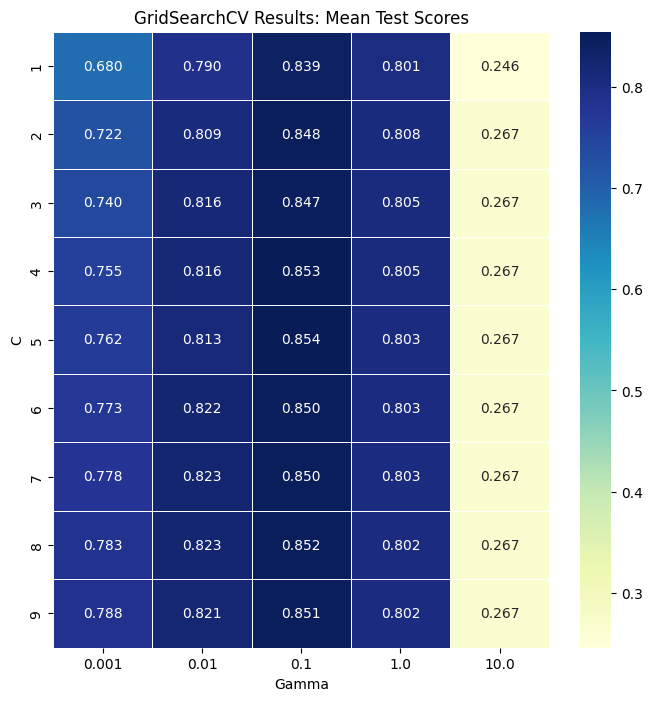

In [ ]:
heatmap_data = grid_results_df_pca.pivot_table(
    index='param_C',       # Rows will be 'C' values
    columns='param_gamma', # Columns will be 'gamma' values
    values='mean_test_score',  # The values to fill the heatmap with (mean test score)
    aggfunc='mean'         # In case there are multiple combinations, take the mean (though there shouldn't be)
)

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5)
plt.title('GridSearchCV Results: Mean Test Scores')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

Below I decided to take two values -

1. I took the best estimators (gamma=0.1 and C=5) and applied this to the test set to see if this yields the best results on the test set and check performance

2. However, I also wanted to be wary of the overfitting issues so I selected two hyperparamters from the grid search results table (C=2, gamma=0.01) which gave the best performance whilst limiting the gap between the main training and test scores so that I could assess if this would outperform the purely accuracy based model

In [ ]:
best_svm = grid_search.best_estimator_

best_svm_fit = SVC(gamma=0.01, C=2, random_state=40446925, kernel='rbf')
best_svm_fit.fit(X_train, y_train)


SVC(C=2, gamma=0.01, random_state=40446925)

### Using best accuracy

Here below is the results of the test set using the best estimator parameters from the Grid Search. Can see that the model achieves an **86.57%** accuracy on the test set which is a **marked improvement (roughly 5%) from the baseline version**.

I will test the other models before going unto greater detail of evaluation

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_svm.predict(X_test)  # Make predictions
test_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8657


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          C1       0.84      0.90      0.87        77
          C2       0.92      0.83      0.87        83
          C3       0.85      0.81      0.83        77
          C4       0.87      0.87      0.87        92
          C5       0.96      0.96      0.96        46
          C6       0.71      0.89      0.79        27

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402

Confusion Matrix:
 [[69  3  1  1  0  3]
 [ 6 69  4  2  0  2]
 [ 4  0 62  7  0  4]
 [ 2  2  5 80  2  1]
 [ 0  0  0  2 44  0]
 [ 1  1  1  0  0 24]]


### Using best fit

Here below is the results of the test set using the best fit parameters from the Grid Search. Can see that the model achieves an **83.08%** accuracy on the test set which is still a **2% improvement** from the baseline but also roughly 3% worse than the model using best accuracy parameters.


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_svm_fit.predict(X_test)  # Make predictions
test_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8308


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          C1       0.76      0.88      0.82        77
          C2       0.84      0.80      0.81        83
          C3       0.85      0.79      0.82        77
          C4       0.83      0.83      0.83        92
          C5       0.96      0.96      0.96        46
          C6       0.79      0.70      0.75        27

    accuracy                           0.83       402
   macro avg       0.84      0.83      0.83       402
weighted avg       0.83      0.83      0.83       402

Confusion Matrix:
 [[68  5  2  1  0  1]
 [ 8 66  4  3  0  2]
 [ 5  0 61 10  0  1]
 [ 7  4  2 76  2  1]
 [ 0  0  0  2 44  0]
 [ 1  4  3  0  0 19]]


##RF

I then decided to test RandomForest through Grid Search.

I set n_estimators to [100, 200, 300, 400, 500] to find the best trade-off between performance and computation time. Deeper trees take longer but are less prone to overfitting.

For max_depth, I included [None, 3, 5, 10] to control tree complexity—deeper trees capture more patterns but risk overfitting.

I tested min_samples_split values [2, 5, 10] to balance flexibility and generalisation. Bootstrap was set to [True, False] to compare standard random sampling with full dataset training.

Finally, I used 10-fold cross-validation (cv=10) for a reliable evaluation across multiple data splits. This ensures I find the best-performing Random Forest model that generalises well while maintaining strong accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

params = [{
    "n_estimators": [100,200,300,400,500],
    "max_depth": [None, 3,5,10],  # Maximum depth of each tree
    "min_samples_split": [2, 5,10],  # Minimum samples required to split an internal node
    "bootstrap": [True, False]  # Whether bootstrap samples are used when building trees
}]

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=404469252)

# Initialize GridSearchCV with the Random Forest model and parameter grid
grid_search = GridSearchCV(rf_model, params, cv=10, scoring="accuracy")

# Fit the model to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=404469252),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [None, 3, 5, 10],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             scoring='accuracy')

In [ ]:
# Print the best parameters, best score, and the best model found
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)
print("Best Estimator (Model):", grid_search.best_estimator_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score: 0.8089324534161492
Best Estimator (Model): RandomForestClassifier(bootstrap=False, n_estimators=200,
                       random_state=404469252)


In [ ]:
best_rf = grid_search.best_estimator_


Can see below that the hyperparameter tuning achieved a score of 82.34% on the test set. This has actually decreased from the baseline by .5%. The fine tuning may have reduced overfitting and better generalisation, but just worse on this particular test set.

Another reason could be that this model is now overtuned on the training data and these patterns are not represented in the test set.

However, as I noticed that this model was outperformed by the SVC, I decided to focus my efforts on examining the SVC in greater detail

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_rf.predict(X_test)  # Make predictions
test_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8234


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          C1       0.81      0.88      0.84        77
          C2       0.85      0.80      0.82        83
          C3       0.81      0.81      0.81        77
          C4       0.80      0.80      0.80        92
          C5       0.96      0.96      0.96        46
          C6       0.71      0.63      0.67        27

    accuracy                           0.82       402
   macro avg       0.82      0.81      0.82       402
weighted avg       0.82      0.82      0.82       402

Confusion Matrix:
 [[68  3  2  3  0  1]
 [ 6 66  4  5  0  2]
 [ 4  1 62  7  0  3]
 [ 5  6  4 74  2  1]
 [ 0  0  0  2 44  0]
 [ 1  2  5  2  0 17]]


### **Discussion of Results**
Below I discuss the main findings from this fine tuning process

### **RF vs SVC**
Looking at the results of both Random Forest (RF) and SVC, several key observations can be made.

First, in terms of overall accuracy, SVC achieved **~87%,** while Random Forest reached **~82%**—a significant difference. I also noticed across F1-score, Recall, and Precision, SVC consistently outperformed RF for every immune subtype.

A major difference I noticed was in the recall for C6, where SVC misclassified only 3 samples, whereas RF misclassified 10. This led to a substantial difference in recall and overall performance, suggesting to me that my RF model struggled to capture the same information that SVC did.

Another key point is how each model responded to hyperparameter tuning. SVC improved significantly, whereas RF showed little to no improvement and even slightly decreased. In my opinion this shows that SVC had more potential for optimisation, while RF either hit a performance ceiling or was less suited for this dataset.

### **Why this is happening and why I will chose SVC**

My data likely, due to its RNA structure favors SVC’s ability to define complex decision boundaries, while Random Forest (RF) struggles to find the most useful features effectively.

Since my dataset has undergone PCA, the features are now linear combinations of the originals and are uncorrelated. SVC, especially with the RBF kernel, captures non-linear patterns in a lower-dimensional space. In contrast, RF relies on raw feature splits, and PCA-transformed data may not provide the structured splits it needs to perform well. As I had to reduce my data for computationbal reasons this is onereason why I think SVC is suited to my data.

Also as I log-transformed the data, this can further benefit SVC, as it is highly sensitive to feature scaling. RF, however, is less affected by scaling and may not gain the same advantage from these transformations. In my opinion,these factors likely contribute to SVC outperforming RF across multiple metrics.


### Bias Variance Tradeoff

I will discuss this in greater detail and with visualisation below (Section 4) but a quick note on this.

The parameters chosen to offer a better fit (less overfitting) perform worse than the accuracy based parameters. However, it is possible that this data has a representative test set with similar patterns to that of the tarining set leading to better results.

However, a counter argument is that overfitting is less of a concern here because PCA-transformed RNA-seq data is already compressed and denoised, reducing redundancy. The test set likely shares similar patterns with the training set, meaning a more complex model (SVC) can still generalise well.

Given the high-dimensional, structured nature of RNA-seq data, traditional overfitting concerns don’t apply in the same way, as the model is capturing meaningful biological signals rather than just noise.

### SVC Hypertuned errors vs Baseline

As expected the tuning of the baseline parameters brought the performance up significantly. The previosu model has seen aboiut a 5% rise in accuarcy and all metrics with recall and precison imporving across the board. Clearly GridSearchCv has been effective here.

# Section 4: Evaluation of Best Model using optimised parameters

In this section, I evaluate my SVC model using test set accuracy, confusion matrices, cross-validation, and bootstrapping to assess its performance, generalizability, and stability.

I look closer into the bias vs variance and also some missclassifcation analysis.

1. Test Set Accuracy and Confusion Matrix
I start by evaluating the test set accuracy with a confusion matrix to examine misclassifications, identifying which immune subtypes are harder to distinguish.

2. Precision, Recall, and F1-Score Analysis through visualisations
Since accuracy alone does not capture model performance fully, I calculate precision, recall, and F1-score for each class. This helps assess how well the model balances false positives and false negatives, ensuring it performs well across all immune subtypes.

3. Misclassification Analysis
To further investigate where the model struggles, I analyse misclassification frequencies by class. i plot bar plots to show which subtypes are misclassified the most, helping identify patterns or potential biases in the model’s decision-making.

4. Bootstrapping for Model Stability
I apply bootstrapping by resampling the training data 1,000 times and retraining the model on each sample. This provides a mean accuracy and standard deviation, giving insight into how sensitive the model is to different training data distributions.

5. Stratified K-Fold Cross-Validation (10-Fold) and Bias-Variance Tradeoff
I then perform 10-fold Stratified K-Fold Cross-Validation to assess the model’s generalisation ability for both best accuracy hyperparameter and best fit hyperparmeters. Using straified K fold helps balance the bias-variance tradeoff by ensuring that each fold maintains a representative class distribution. By comparing training and validation accuracy across folds, I check for signs of overfitting (high variance) or underfitting (high bias). I visualise through plots

Here I load in my best model

In [ ]:
best_svm = SVC(gamma=0.1, C=5, random_state=40446925, kernel='rbf')
best_svm.fit(X_train, y_train)

SVC(C=5, gamma=0.1, random_state=40446925)

### Using best accuracy (gamma = 0.1 and C=5)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_svm.predict(X_test)  # Make predictions
test_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8657


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          C1       0.84      0.90      0.87        77
          C2       0.92      0.83      0.87        83
          C3       0.85      0.81      0.83        77
          C4       0.87      0.87      0.87        92
          C5       0.96      0.96      0.96        46
          C6       0.71      0.89      0.79        27

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402

Confusion Matrix:
 [[69  3  1  1  0  3]
 [ 6 69  4  2  0  2]
 [ 4  0 62  7  0  4]
 [ 2  2  5 80  2  1]
 [ 0  0  0  2 44  0]
 [ 1  1  1  0  0 24]]


###Plotting of Confusion Matrix and discussion of misclassified samples

Looking at the confusion matrix, a few things stand out.

The model struggles the most with Immune Subtype C4, misclassifying it across multiple categories. This suggests it's not picking up enough useful features from the metagenes for this subtype, leading to a bit of guesswork in classification.

There’s also a pattern of misclassifications that might point to overlapping features or class imbalances in the data. Since the dataset has gone through dimensionality reduction, some subtypes could have become harder to separate, making it trickier for the model to draw clear decision boundaries.

However, in saying this there are many positives to this model. The PCA and log transformations have been sucessful as the majority of sampoles are correctly classified. C5 performs excellently with 2 False Positives. This model also does well on predicting True positives for C6 but does struggle with False positives and is prone to preidcting C6 which effects precision.

**Note:** A **KEY **takeaway from this model is that its struggles are more with precision than recall in some cases. For a biological and cancer dataset, this is actually a better problem to have. False Negatives (missing true cases) are more concerning in this context because they can lead to missed diagnoses or delayed treatments. False Positives, though not what I want, are less problematic since they can lead to follow-up tests or further validation, which is generally a safer approach in this context.

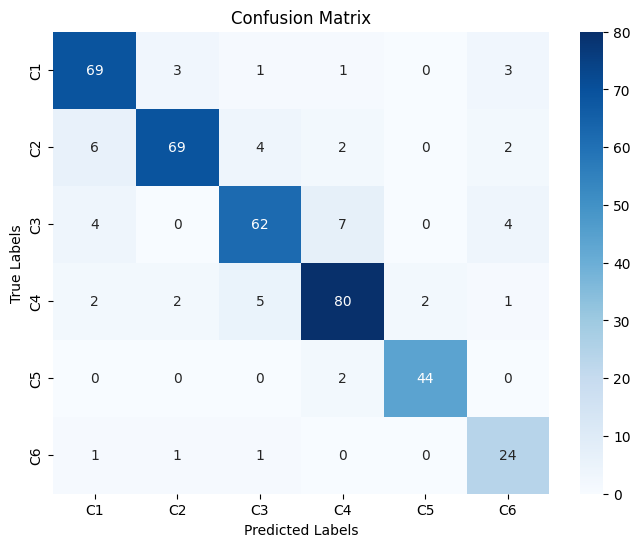

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Below is a plot visualising my key findings mentioned above.

Metrics by Immune Subtype:
  Immune Subtypes  Precision    Recall  F1-Score  Accuracy
0              C1   0.841463  0.896104  0.867925  0.896104
1              C2   0.920000  0.831325  0.873418  0.831325
2              C3   0.849315  0.805195  0.826667  0.805195
3              C4   0.869565  0.869565  0.869565  0.869565
4              C5   0.956522  0.956522  0.956522  0.956522
5              C6   0.705882  0.888889  0.786885  0.888889


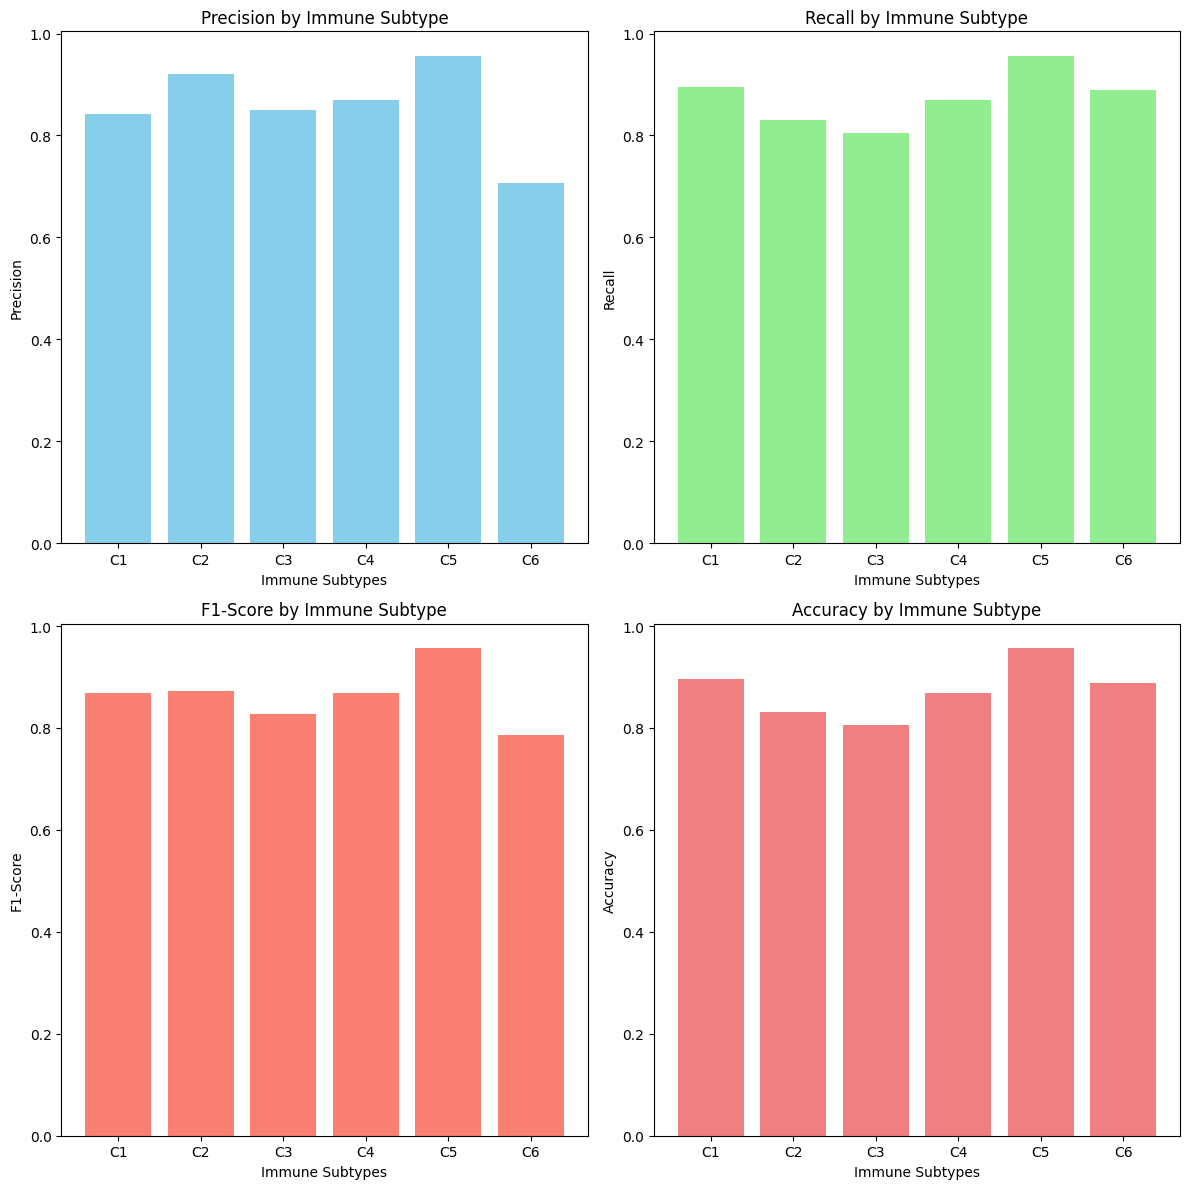

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Calculate accuracy per class as the ratio of correctly predicted instances for each class
accuracy_per_class = np.diag(cm) / np.sum(cm, axis=1)

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Immune Subtypes': np.unique(y_test),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Accuracy': accuracy_per_class  # Add accuracy column
})

# Print the metrics values
print("Metrics by Immune Subtype:")
print(metrics_df)

# Plot each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Precision plot
axes[0, 0].bar(metrics_df['Immune Subtypes'], metrics_df['Precision'], color='skyblue')
axes[0, 0].set_title('Precision by Immune Subtype')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_xlabel('Immune Subtypes')

# Recall plot
axes[0, 1].bar(metrics_df['Immune Subtypes'], metrics_df['Recall'], color='lightgreen')
axes[0, 1].set_title('Recall by Immune Subtype')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_xlabel('Immune Subtypes')

# F1-Score plot
axes[1, 0].bar(metrics_df['Immune Subtypes'], metrics_df['F1-Score'], color='salmon')
axes[1, 0].set_title('F1-Score by Immune Subtype')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_xlabel('Immune Subtypes')

# Accuracy plot
axes[1, 1].bar(metrics_df['Immune Subtypes'], metrics_df['Accuracy'], color='lightcoral')
axes[1, 1].set_title('Accuracy by Immune Subtype')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_xlabel('Immune Subtypes')

plt.tight_layout()
plt.show()


Now below is the datafram conatining the True and Predicted label. To make thsi clearer, below this I visulaised these figures and analysed from this.

In [ ]:
misclassified_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

misclassified_df = misclassified_df[misclassified_df['True Label'] != misclassified_df['Predicted Label']]

# Display the misclassified samples
print(misclassified_df)

                     True Label Predicted Label
TCGA-04-1514-OV-C2           C2              C1
TCGA-DK-A3IK-BLCA-C3         C3              C1
TCGA-CJ-4923-KIRC-C2         C2              C3
TCGA-DX-AB37-SARC-C2         C2              C6
TCGA-PC-A5DO-SARC-C3         C3              C6
TCGA-CG-4305-STAD-C2         C2              C1
TCGA-E9-A1NH-BRCA-C3         C3              C6
TCGA-TT-A6YN-PCPG-C5         C5              C4
TCGA-BG-A2AE-UCEC-C1         C1              C2
TCGA-BW-A5NP-LIHC-C3         C3              C4
TCGA-F5-6571-READ-C3         C3              C1
TCGA-D8-A1J9-BRCA-C4         C4              C2
TCGA-Q3-A5QY-PAAD-C3         C3              C6
TCGA-QR-A700-PCPG-C4         C4              C3
TCGA-DD-A4NK-LIHC-C3         C3              C4
TCGA-93-A4JP-LUAD-C4         C4              C3
TCGA-WB-A81D-PCPG-C3         C3              C4
TCGA-S9-A6WG-LGG-C4          C4              C3
TCGA-BR-4370-STAD-C1         C1              C6
TCGA-AA-3866-COAD-C2         C2         

This plot below shows the number of times a True label was misclassified as another label.

For example, if the True Label was C6 but it was predicted as C4, this would count as an occurrence of C6 in the graph below.

It’s clear that the model struggles to distinguish between C3, C2, and C4. To better understand if these misclassifications are between these specific classes, I will assess the misclassifications by class.

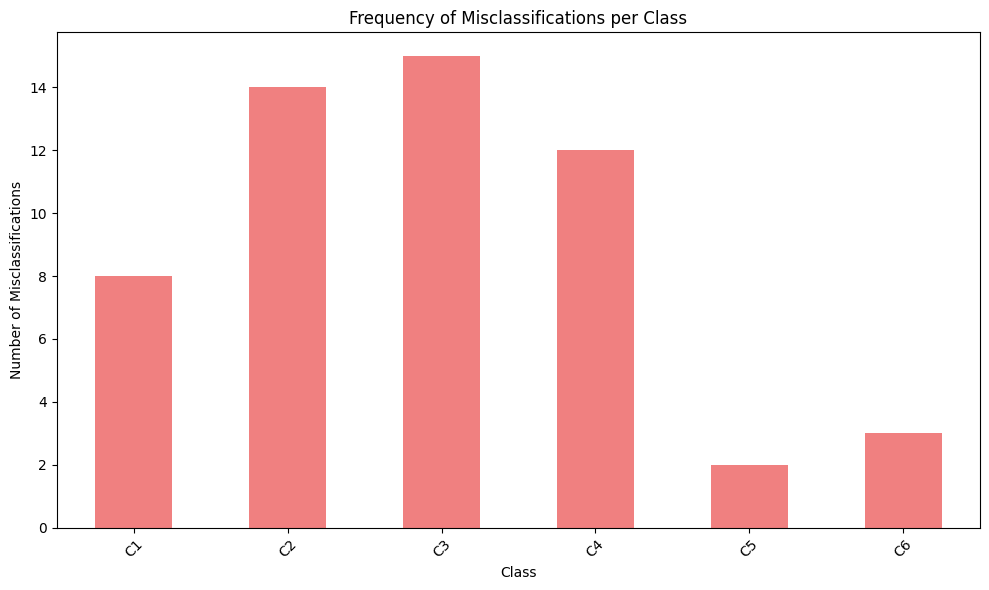

In [ ]:
# Calculate frequency of misclassifications by class
misclass_counts = misclassified_df.groupby('True Label').size()

# Plot the frequency of misclassifications per class
plt.figure(figsize=(10, 6))
misclass_counts.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Misclassifications per Class')
plt.xlabel('Class')
plt.ylabel('Number of Misclassifications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This bar plot visualises the misclassifications by counting how many times each true label was predicted as another label. The bars represent the number of misclassifications, with different colors indicating the predicted labels for each true label.

There is clearly an issue surrounding features and information taht distinguish C4 from C3 and visa versa. This is causing a significant number of the inaccuracies in my model.

A lot of the errors seem to be surroudning C4 which is an interesting topic to look further into. Perhaps the training preprocessing isnt suited to these particular figures (maybe they included more outliers etc) This would be one possible area to improve further.

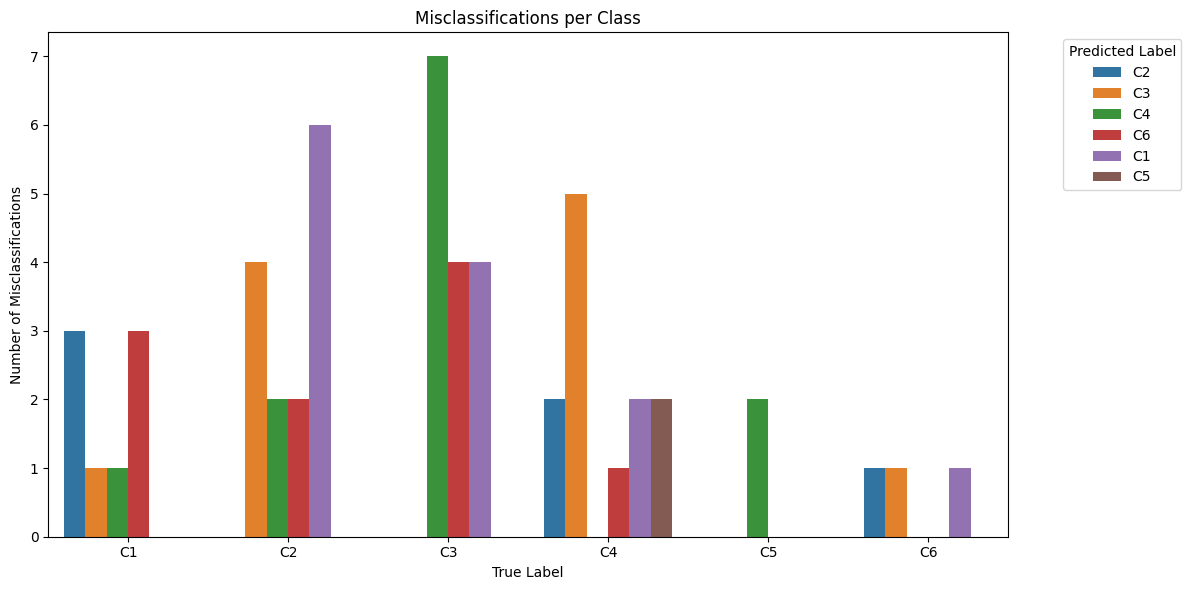

In [ ]:
# Count how many times each class was misclassified
misclass_count = misclassified_df.groupby(['True Label', 'Predicted Label']).size().reset_index(name='Count')

# Plotting misclassifications as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="True Label", y="Count", hue="Predicted Label", data=misclass_count)
plt.title('Misclassifications per Class')
plt.xlabel('True Label')
plt.ylabel('Number of Misclassifications')
plt.legend(title="Predicted Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Bootstrapping using best model

In order to asses the stability of my model I used bootstarpping to test how my model performs across different subsets of my data.

This will give me a more robust evaluation of my models accuarcy and I can also access variability of the model's predictions which will show its ability to generalise.

In [ ]:
svc_classifier = best_svm

num_bootstraps = 1000

accuracy_scores = []

for _ in range(num_bootstraps):
    # Create a bootstrap sample
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_bootstrap = X_train[indices]
    y_train_bootstrap = y_train[indices]

    # Train
    svc_classifier.fit(X_train_bootstrap, y_train_bootstrap)

    # Predict and evaluate
    y_pred = svc_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores.append(accuracy)

# Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
#

<ipython-input-147-5b93f7a12b21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_bootstrap = y_train[indices]
<ipython-input-147-5b93f7a12b21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_bootstrap = y_train[indices]
<ipython-input-147-5b93f7a12b21>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_bootstrap = y_train[indices]
<ipython-input-147-5b93f7a12b21>:11: FutureWarning: Series.__getitem__ treat

Mean Accuracy: 0.8510
Standard Deviation of Accuracy: 0.0105


Across the 1000 bootstrapped samples my data achieved a mean accuracy of 85.1% which is only a minimal drop from my test set performance which shows quite a stable and reliable model. I was pleased with this. The **low standard deviation score of 0.0105** shows my model is stable across the different sampls.

This allows me to conclude that my model's accuracy is consistent and reliable, with only a small variation in its performance and shows taht the use of stratificiation in my test set helped ceate a represenattive test set.

## Examining Bias/Variance using K-fold

The final piece of evaluation I wanted to do was to analyse the plots of my models accuracy to assess if overfitting was present. In order to do this I used Stratified K-fold. This split the data into mutliple folds, ensuring an even distribution in test set and allowed me to track the performance across each fold and then plot these.

I performed this for both my best model accuracy wise and then also my model which tried to strike a balance between perfomance and fit. The results and plot can be seen in the output cells below

###KFOLD best accuracy

Fold 1: Train Accuracy = 0.9320, Validation Accuracy = 0.8507
Confusion Matrix:
[[34  0  1  1  0  2]
 [ 6 32  1  1  0  1]
 [ 3  0 33  2  0  1]
 [ 3  0  3 40  0  1]
 [ 0  0  0  2 21  0]
 [ 1  1  0  0  0 11]]




<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 2: Train Accuracy = 0.9303, Validation Accuracy = 0.8557
Confusion Matrix:
[[35  2  0  1  0  0]
 [ 3 34  2  1  0  1]
 [ 2  0 32  4  0  1]
 [ 1  1  3 38  3  1]
 [ 0  0  0  1 22  0]
 [ 1  0  0  1  0 11]]


Fold 3: Train Accuracy = 0.9298, Validation Accuracy = 0.8159
Confusion Matrix:
[[31  2  1  1  0  3]
 [ 1 35  1  1  0  4]
 [ 2  1 31  3  0  2]
 [ 2  1  3 38  2  0]
 [ 0  0  0  1 22  0]
 [ 0  1  4  1  0  7]]




<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 4: Train Accuracy = 0.9298, Validation Accuracy = 0.8507
Confusion Matrix:
[[33  2  0  1  0  3]
 [ 5 37  0  0  0  0]
 [ 0  0 32  5  0  1]
 [ 3  0  1 38  3  1]
 [ 0  0  0  1 22  0]
 [ 1  1  2  0  0  9]]


Fold 5: Train Accuracy = 0.9336, Validation Accuracy = 0.8557
Confusion Matrix:
[[37  0  0  0  0  2]
 [ 1 39  0  0  0  2]
 [ 0  0 30  3  1  4]
 [ 4  1  3 37  1  0]
 [ 0  0  0  1 22  0]
 [ 1  1  3  1  0  7]]




<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 6: Train Accuracy = 0.9287, Validation Accuracy = 0.8557
Confusion Matrix:
[[37  0  0  0  0  2]
 [ 3 36  2  1  0  0]
 [ 2  2 29  2  0  3]
 [ 3  0  3 38  2  0]
 [ 0  0  0  0 23  0]
 [ 1  1  1  1  0  9]]


Fold 7: Train Accuracy = 0.9287, Validation Accuracy = 0.8657
Confusion Matrix:
[[36  1  0  0  0  2]
 [ 2 37  1  1  0  0]
 [ 2  0 30  5  0  1]
 [ 0  0  5 40  1  0]
 [ 0  0  0  2 21  0]
 [ 2  0  1  1  0 10]]




<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 8: Train Accuracy = 0.9303, Validation Accuracy = 0.8756
Confusion Matrix:
[[36  1  0  0  0  2]
 [ 2 36  1  0  0  2]
 [ 1  0 33  3  0  1]
 [ 2  0  4 40  0  0]
 [ 0  0  0  1 22  0]
 [ 1  2  0  2  0  9]]


Fold 9: Train Accuracy = 0.9281, Validation Accuracy = 0.8756
Confusion Matrix:
[[30  3  0  2  0  3]
 [ 2 37  0  2  0  0]
 [ 0  0 36  2  0  0]
 [ 3  0  2 39  1  1]
 [ 0  0  0  1 23  0]
 [ 1  0  2  0  0 11]]




<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-148-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 10: Train Accuracy = 0.9270, Validation Accuracy = 0.8950
Confusion Matrix:
[[35  2  0  1  0  0]
 [ 1 39  1  0  0  0]
 [ 2  0 32  3  0  1]
 [ 0  0  5 39  2  0]
 [ 0  0  0  0 23  0]
 [ 0  1  1  1  0 11]]


Overall Accuracy: 0.8596


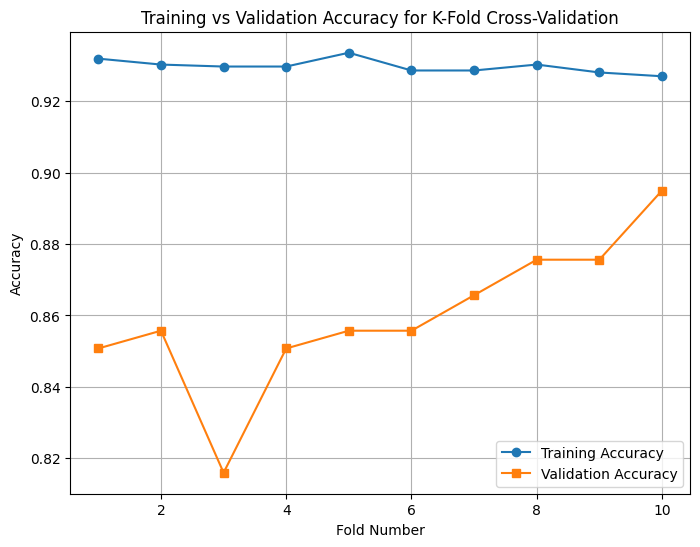

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have W (features) and y (labels) already defined
num_folds = 10

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=40446925)

# List to store fold accuracies
train_accuracies = []
val_accuracies = []

# Perform Stratified K-Fold cross-validation and store fold results
for fold, (train_index, test_index) in enumerate(kf.split(W, y), 1):
    X_train, X_test = W[train_index], W[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the fold's training data
    svc_classifier.fit(X_train, y_train)

    # Make predictions on the test fold
    y_pred = svc_classifier.predict(X_test)

    # Calculate accuracy for this fold
    train_accuracy = accuracy_score(y_train, svc_classifier.predict(X_train))  # Training accuracy
    val_accuracy = accuracy_score(y_test, y_pred)  # Validation accuracy

    # Store the accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print fold results
    print(f"Fold {fold}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Calculate and print overall accuracy (mean across all folds)
overall_accuracy = accuracy_score(y, cross_val_predict(svc_classifier, W, y, cv=kf))
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Plotting the train and validation accuracy
plt.figure(figsize=(8,6))
plt.plot(range(1, num_folds + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_folds + 1), val_accuracies, label='Validation Accuracy', marker='s')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for K-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


###KFOLD best fit

<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 1: Train Accuracy = 0.8319, Validation Accuracy = 0.8060
Confusion Matrix:
[[33  1  2  0  0  2]
 [ 5 33  1  1  0  1]
 [ 2  0 33  3  0  1]
 [ 5  2  4 33  2  1]
 [ 0  0  0  3 20  0]
 [ 1  1  0  1  0 10]]


Fold 2: Train Accuracy = 0.8296, Validation Accuracy = 0.8060
Confusion Matrix:
[[32  4  0  2  0  0]
 [ 4 34  2  1  0  0]
 [ 2  0 28  6  0  3]
 [ 2  1  5 36  2  1]
 [ 0  0  0  1 22  0]
 [ 1  0  1  1  0 10]]


Fold 3: Train Accuracy = 0.8335, Validation Accuracy = 0.7811
Confusion Matrix:
[[29  3  1  2  0  3]
 [ 3 34  1  0  0  4]
 [ 2  0 28  5  0  4]
 [ 2  2  4 36  2  0]
 [ 0  0  0  2 21  0]
 [ 0  2  1  1  0  9]]




<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 4: Train Accuracy = 0.8335, Validation Accuracy = 0.8010
Confusion Matrix:
[[34  4  0  0  0  1]
 [ 4 37  0  1  0  0]
 [ 2  0 30  6  0  0]
 [ 3  2  2 29  7  3]
 [ 0  0  0  0 23  0]
 [ 0  2  2  1  0  8]]


Fold 5: Train Accuracy = 0.8296, Validation Accuracy = 0.8557
Confusion Matrix:
[[35  1  0  1  0  2]
 [ 4 37  0  0  0  1]
 [ 1  0 32  3  0  2]
 [ 1  2  3 38  2  0]
 [ 0  0  0  1 22  0]
 [ 0  2  2  1  0  8]]




<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 6: Train Accuracy = 0.8302, Validation Accuracy = 0.8308
Confusion Matrix:
[[35  1  1  0  0  2]
 [ 4 35  2  1  0  0]
 [ 2  0 31  3  0  2]
 [ 4  0  5 36  1  0]
 [ 0  0  0  2 21  0]
 [ 0  1  3  0  0  9]]


Fold 7: Train Accuracy = 0.8313, Validation Accuracy = 0.8308
Confusion Matrix:
[[35  3  0  0  0  1]
 [ 3 34  2  2  0  0]
 [ 3  0 31  4  0  0]
 [ 1  1  6 37  1  0]
 [ 0  0  0  2 21  0]
 [ 4  0  1  0  0  9]]




<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 8: Train Accuracy = 0.8313, Validation Accuracy = 0.8159
Confusion Matrix:
[[34  1  0  1  0  3]
 [ 5 32  1  2  0  1]
 [ 1  0 35  2  0  0]
 [ 6  1  5 33  1  0]
 [ 0  0  0  1 22  0]
 [ 3  0  1  2  0  8]]


Fold 9: Train Accuracy = 0.8291, Validation Accuracy = 0.8159
Confusion Matrix:
[[30  2  0  2  0  4]
 [ 2 35  1  3  0  0]
 [ 0  0 30  8  0  0]
 [ 4  1  3 36  1  1]
 [ 0  0  0  2 22  0]
 [ 1  0  2  0  0 11]]




<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-150-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 10: Train Accuracy = 0.8308, Validation Accuracy = 0.8400
Confusion Matrix:
[[33  3  1  0  0  1]
 [ 2 36  2  0  0  1]
 [ 2  0 32  3  0  1]
 [ 3  2  5 34  2  0]
 [ 0  0  0  0 23  0]
 [ 0  3  0  1  0 10]]


Overall Accuracy: 0.8183


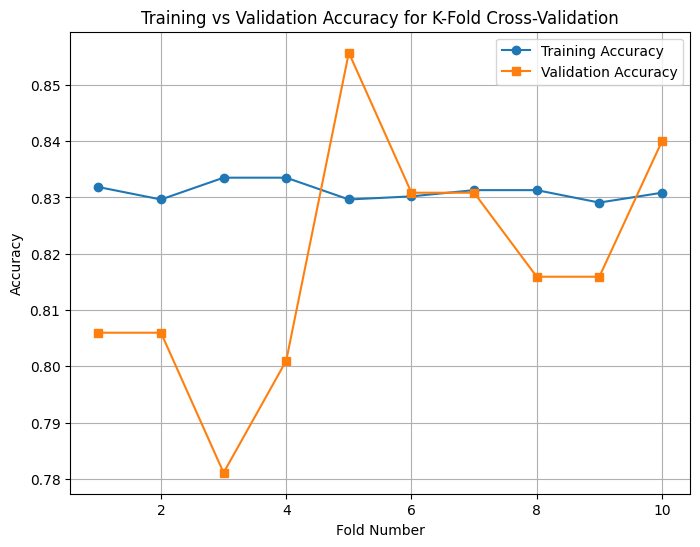

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have W (features) and y (labels) already defined
num_folds = 10

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=40446925)

# List to store fold accuracies
train_accuracies = []
val_accuracies = []

# Perform Stratified K-Fold cross-validation and store fold results
for fold, (train_index, test_index) in enumerate(kf.split(W, y), 1):
    X_train, X_test = W[train_index], W[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the fold's training data
    best_svm_fit.fit(X_train, y_train)

    # Make predictions on the test fold
    y_pred = best_svm_fit.predict(X_test)

    # Calculate accuracy for this fold
    train_accuracy = accuracy_score(y_train, best_svm_fit.predict(X_train))  # Training accuracy
    val_accuracy = accuracy_score(y_test, y_pred)  # Validation accuracy

    # Store the accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print fold results
    print(f"Fold {fold}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Calculate and print overall accuracy (mean across all folds)
overall_accuracy = accuracy_score(y, cross_val_predict(best_svm_fit, W, y, cv=kf))
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Plotting the train and validation accuracy
plt.figure(figsize=(8,6))
plt.plot(range(1, num_folds + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_folds + 1), val_accuracies, label='Validation Accuracy', marker='s')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for K-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


### Discussion of plots

From looking at the two plots there area number of obvious takeaways,

Firstly, it is clear that my main model is overfitting. There is a gap between training and validation accuarcy and yet it outperforms the other models.

The model with lower gamma and C values is less overfitting but is quite ustable across the folds showing incosistency in generalisation.

However, while the model is overfitting this was one of the major challenegs of this project. The model is most likely overfitting due to the number of PCA features it is being fed. However, (same for NMF but worse) if I lower the number of features the perfomance significantly decreases. Also this is gene RNA-seq data and a lot of the data is noisy and difficult to distingusihs and therefore overfitting is likely.

In this case, my takeaway is a bit of overfitting seems to be preferable to underfitting. The patterns identified by the model across datasets are relatively similar, as shown through bootstrapping. I feel that given that this is RNA-seq and biological data, which is naturally noisy, overfitting might be a necessary trade-off for capturing the complex relationships in the data.

# Overall Takeaways and Review of Model



This section is just some of the key takeaways of my report. The more in depth analysis is seen above:

**Creating the dataset**
There were some challenges creating the dataset with matching barcodes being the main issue.

**Preprocesing**
1. Log Transforming the data helped deal with outliers whilst also reducing range
2. Follwing log transformation MinMax outperfomed StandardScaler due to the new reduced range
3. Given the preprocessing steps taken PCA outperformed NMF - I found that PCA was better suited to the MinMax data and better captured the relevant information
4. Was quite challeneging to distinguish between noise and relevant information
5. Battling rsik of overfitting while still having enough features to have a solid performance was a big challenge in this task. In the end more features, which led to slight overfitting, was the better solution due to the nature of the data and the preprocessing

**Classification**
1. Gradient Boosting and Random Forest perfomed very similarly.
2. SVC provided the most balanced results across all metrics and responded to hyperparmeter tuning best
3. Tuning increased accuracy by ~5% for SVC

**SVC Model**
1. Perfomed well across all metrics
2. Struggled with C4 classification the most
3. Had slight overfitting
4. Had stable learning across 1000 bootstrapped samples showing that the overfitting may be necessary to access patterns in the RNA data to distinguish from the noise that it naturally contains
5. Perfomed very well at C5

**Steps to imporve the model**

Perhaps using the NC approach mentioned in the lectures could imporve this model further to emphasise confident predictions which would boost accuracy.

If given more computational resourses maybe a less restrictive dimensionalty reduction approach could prove informative and provide a bit more information to the model to help uit distingusih between those harder cases.

Overall I feel I followed a strict approach ensuring the best steps taken. All my actions in preprocessing were taken due to what I was seeing in the data and the reasonong for my selected models was given. Whilst accuracy wasnt as high as I had hoped I am happy with my processes.


# Appendix

## Classifiction Using NMF (Not used for my final model - Go to Classification for PCA to find the models I used)

I included this to show the difference in reuslts between PCA and NMF reduction

For an indepth discussion of selection of methods etc please see PCA section


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(W, y, test_size=0.2, stratify= y, random_state=40446925)

In [ ]:
print(f'The shape of training data {X_train.shape}')
print(f'The shape of testing data {X_test.shape}')
print(f'The shape of training labels {y_train.shape}')
print(f'The shape of testing labels {y_test.shape}')

The shape of training data (1607, 25)
The shape of testing data (402, 25)
The shape of training labels (1607,)
The shape of testing labels (402,)


###

In [ ]:
rf_classifier = RandomForestClassifier(random_state=40446925)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.7736
Classification Report:
              precision    recall  f1-score   support

          C1       0.71      0.79      0.75        77
          C2       0.77      0.78      0.78        83
          C3       0.77      0.74      0.75        77
          C4       0.75      0.83      0.79        92
          C5       0.98      0.93      0.96        46
          C6       0.69      0.33      0.45        27

    accuracy                           0.77       402
   macro avg       0.78      0.73      0.75       402
weighted avg       0.77      0.77      0.77       402



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Initialize the SVC model with specified parameters
#svc_model = SVC(gamma=0.027, C=123201, random_state=40446925) #86%

svc_model = SVC(random_state=40446925) #85%
# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.7910
Classification Report:
              precision    recall  f1-score   support

          C1       0.71      0.78      0.75        77
          C2       0.82      0.77      0.80        83
          C3       0.78      0.74      0.76        77
          C4       0.77      0.83      0.80        92
          C5       0.96      0.98      0.97        46
          C6       0.76      0.59      0.67        27

    accuracy                           0.79       402
   macro avg       0.80      0.78      0.79       402
weighted avg       0.79      0.79      0.79       402



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

gb_classifier = GradientBoostingClassifier(random_state=40446925)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.8159
Classification Report:
              precision    recall  f1-score   support

          C1       0.77      0.84      0.81        77
          C2       0.83      0.82      0.82        83
          C3       0.84      0.77      0.80        77
          C4       0.82      0.83      0.82        92
          C5       0.92      0.96      0.94        46
          C6       0.64      0.59      0.62        27

    accuracy                           0.82       402
   macro avg       0.80      0.80      0.80       402
weighted avg       0.82      0.82      0.82       402



###Grid

###SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
params = [{
    "C": [1,2,3,4,5,6,7,8,9],
    "gamma": [10,1,0.1,0.01,0.001],
    "kernel": ['rbf']
}]

grid_search = GridSearchCV(svc_model, params, cv=10, scoring="accuracy",return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=40446925),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': [10, 1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
print(grid_search.best_params_)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

{'C': 6, 'gamma': 1, 'kernel': 'rbf'}
0.8219992236024846
SVC(C=6, gamma=1, random_state=40446925)


In [ ]:
grid_results_df_pca= pd.DataFrame(grid_search.cv_results_)
print(grid_results_df_pca[["params","mean_train_score","mean_test_score","rank_test_score"]].sort_values(by="rank_test_score"))

                                       params  mean_train_score  \
26      {'C': 6, 'gamma': 1, 'kernel': 'rbf'}          0.889304   
31      {'C': 7, 'gamma': 1, 'kernel': 'rbf'}          0.894904   
36      {'C': 8, 'gamma': 1, 'kernel': 'rbf'}          0.898845   
21      {'C': 5, 'gamma': 1, 'kernel': 'rbf'}          0.884049   
41      {'C': 9, 'gamma': 1, 'kernel': 'rbf'}          0.903340   
16      {'C': 4, 'gamma': 1, 'kernel': 'rbf'}          0.876374   
11      {'C': 3, 'gamma': 1, 'kernel': 'rbf'}          0.864067   
6       {'C': 2, 'gamma': 1, 'kernel': 'rbf'}          0.844431   
5      {'C': 2, 'gamma': 10, 'kernel': 'rbf'}          0.972827   
40     {'C': 9, 'gamma': 10, 'kernel': 'rbf'}          0.999931   
10     {'C': 3, 'gamma': 10, 'kernel': 'rbf'}          0.985895   
15     {'C': 4, 'gamma': 10, 'kernel': 'rbf'}          0.993293   
30     {'C': 7, 'gamma': 10, 'kernel': 'rbf'}          0.999447   
1       {'C': 1, 'gamma': 1, 'kernel': 'rbf'}          0.81746

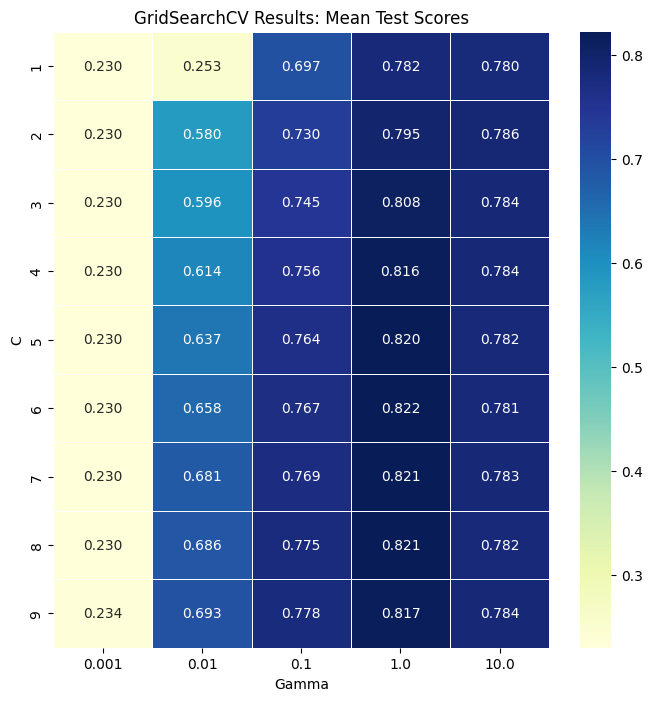

In [ ]:
heatmap_data = grid_results_df_pca.pivot_table(
    index='param_C',       # Rows will be 'C' values
    columns='param_gamma', # Columns will be 'gamma' values
    values='mean_test_score',  # The values to fill the heatmap with (mean test score)
    aggfunc='mean'         # In case there are multiple combinations, take the mean (though there shouldn't be)
)

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5)
plt.title('GridSearchCV Results: Mean Test Scores')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [ ]:
best_svm = grid_search.best_estimator_

best_svm_fit = SVC(gamma=1, C=2, random_state=40446925, kernel='rbf')
best_svm_fit.fit(X_train, y_train)


SVC(C=2, gamma=1, random_state=40446925)

### Using best accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_svm.predict(X_test)  # Make predictions
test_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8234


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          C1       0.78      0.86      0.81        77
          C2       0.81      0.80      0.80        83
          C3       0.86      0.79      0.82        77
          C4       0.82      0.84      0.83        92
          C5       0.96      0.93      0.95        46
          C6       0.69      0.67      0.68        27

    accuracy                           0.82       402
   macro avg       0.82      0.81      0.82       402
weighted avg       0.82      0.82      0.82       402

Confusion Matrix:
 [[66  7  1  2  0  1]
 [ 8 66  4  3  0  2]
 [ 5  0 61  8  0  3]
 [ 6  3  2 77  2  2]
 [ 0  0  0  3 43  0]
 [ 0  5  3  1  0 18]]


### Using best fit

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_svm_fit.predict(X_test)  # Make predictions
test_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8035


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          C1       0.78      0.81      0.79        77
          C2       0.81      0.80      0.80        83
          C3       0.78      0.78      0.78        77
          C4       0.78      0.83      0.80        92
          C5       0.94      0.96      0.95        46
          C6       0.75      0.56      0.64        27

    accuracy                           0.80       402
   macro avg       0.81      0.79      0.79       402
weighted avg       0.80      0.80      0.80       402

Confusion Matrix:
 [[62  7  5  3  0  0]
 [ 6 66  4  5  0  2]
 [ 6  0 60 10  0  1]
 [ 6  3  2 76  3  2]
 [ 0  0  0  2 44  0]
 [ 0  5  6  1  0 15]]


### With bootstrapping best accuracy

In [ ]:
svc_classifier = SVC(gamma=1, C=6, random_state=40446925, kernel='rbf')

num_bootstraps = 1000

accuracy_scores = []

for _ in range(num_bootstraps):
    # Create a bootstrap sample
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_bootstrap = X_train[indices]
    y_train_bootstrap = y_train[indices]

    # Train
    svc_classifier.fit(X_train_bootstrap, y_train_bootstrap)

    # Predict and evaluate
    y_pred = svc_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores.append(accuracy)

# Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
#

<ipython-input-132-9dd149fb6784>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_bootstrap = y_train[indices]
<ipython-input-132-9dd149fb6784>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_bootstrap = y_train[indices]
<ipython-input-132-9dd149fb6784>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_bootstrap = y_train[indices]
<ipython-input-132-9dd149fb6784>:11: FutureWarning: Series.__getitem__ treat

Mean Accuracy: 0.8060
Standard Deviation of Accuracy: 0.0119


###KFOLD best accuracy

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict
from sklearn.svm import SVC

num_folds = 10

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=40446925)

predicted = cross_val_predict(svc_classifier, W,y, cv=kf)

for fold, (train_index, test_index) in enumerate(kf.split(W,y), 1):
    y_test = y[test_index]
    y_pred = predicted[test_index]
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("\n")


overall_accuracy = accuracy_score(y, predicted)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

Fold 1: Accuracy = 0.8259
Confusion Matrix:
[[34  0  2  0  0  2]
 [ 4 33  2  2  0  0]
 [ 1  0 32  5  0  1]
 [ 4  0  5 36  1  1]
 [ 0  0  0  2 21  0]
 [ 1  2  0  0  0 10]]


Fold 2: Accuracy = 0.8209
Confusion Matrix:
[[33  3  0  2  0  0]
 [ 5 33  1  2  0  0]
 [ 2  1 32  3  0  1]
 [ 3  0  3 38  2  1]
 [ 0  0  0  2 21  0]
 [ 1  0  3  1  0  8]]


Fold 3: Accuracy = 0.7910
Confusion Matrix:
[[31  3  1  0  0  3]
 [ 0 38  1  1  0  2]
 [ 3  1 28  4  0  3]
 [ 6  1  4 34  1  0]
 [ 0  0  1  1 21  0]
 [ 0  1  4  1  0  7]]


Fold 4: Accuracy = 0.8060
Confusion Matrix:
[[30  4  1  1  0  3]
 [ 4 38  0  0  0  0]
 [ 0  0 32  5  1  0]
 [ 5  0  1 34  5  1]
 [ 0  0  0  1 22  0]
 [ 1  2  4  0  0  6]]


Fold 5: Accuracy = 0.8308
Confusion Matrix:
[[29  3  0  5  0  2]
 [ 0 41  0  0  0  1]
 [ 3  0 29  2  0  4]
 [ 2  2  3 38  1  0]
 [ 0  0  0  1 22  0]
 [ 0  2  2  1  0  8]]


Fold 6: Accuracy = 0.7960
Confusion Matrix:
[[33  2  1  1  0  2]
 [ 6 32  2  2  0  0]
 [ 2  1 30  4  0  1]
 [ 6  0  5 33  2  0]
 [ 0  0

<ipython-input-133-6a89f31a1abc>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = y[test_index]
<ipython-input-133-6a89f31a1abc>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = y[test_index]
<ipython-input-133-6a89f31a1abc>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = y[test_index]
<ipython-input-133-6a89f31a1abc>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a 

<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 1: Train Accuracy = 0.8855, Validation Accuracy = 0.8259
Confusion Matrix:
[[34  0  2  0  0  2]
 [ 4 33  2  2  0  0]
 [ 1  0 32  5  0  1]
 [ 4  0  5 36  1  1]
 [ 0  0  0  2 21  0]
 [ 1  2  0  0  0 10]]


Fold 2: Train Accuracy = 0.8866, Validation Accuracy = 0.8209
Confusion Matrix:
[[33  3  0  2  0  0]
 [ 5 33  1  2  0  0]
 [ 2  1 32  3  0  1]
 [ 3  0  3 38  2  1]
 [ 0  0  0  2 21  0]
 [ 1  0  3  1  0  8]]


Fold 3: Train Accuracy = 0.8844, Validation Accuracy = 0.7910
Confusion Matrix:
[[31  3  1  0  0  3]
 [ 0 38  1  1  0  2]
 [ 3  1 28  4  0  3]
 [ 6  1  4 34  1  0]
 [ 0  0  1  1 21  0]
 [ 0  1  4  1  0  7]]




<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 4: Train Accuracy = 0.8855, Validation Accuracy = 0.8060
Confusion Matrix:
[[30  4  1  1  0  3]
 [ 4 38  0  0  0  0]
 [ 0  0 32  5  1  0]
 [ 5  0  1 34  5  1]
 [ 0  0  0  1 22  0]
 [ 1  2  4  0  0  6]]


Fold 5: Train Accuracy = 0.8894, Validation Accuracy = 0.8308
Confusion Matrix:
[[29  3  0  5  0  2]
 [ 0 41  0  0  0  1]
 [ 3  0 29  2  0  4]
 [ 2  2  3 38  1  0]
 [ 0  0  0  1 22  0]
 [ 0  2  2  1  0  8]]




<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 6: Train Accuracy = 0.8811, Validation Accuracy = 0.7960
Confusion Matrix:
[[33  2  1  1  0  2]
 [ 6 32  2  2  0  0]
 [ 2  1 30  4  0  1]
 [ 6  0  5 33  2  0]
 [ 0  0  0  0 23  0]
 [ 2  1  1  0  0  9]]


Fold 7: Train Accuracy = 0.8838, Validation Accuracy = 0.8507
Confusion Matrix:
[[31  4  2  1  0  1]
 [ 2 36  2  1  0  0]
 [ 2  0 33  2  0  1]
 [ 1  1  2 40  1  1]
 [ 0  0  0  2 21  0]
 [ 2  0  1  1  0 10]]




<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 8: Train Accuracy = 0.8850, Validation Accuracy = 0.8358
Confusion Matrix:
[[34  1  1  1  0  2]
 [ 3 36  1  0  0  1]
 [ 2  0 33  3  0  0]
 [ 3  1  5 37  0  0]
 [ 0  0  0  1 22  0]
 [ 3  2  1  2  0  6]]


Fold 9: Train Accuracy = 0.8844, Validation Accuracy = 0.8259
Confusion Matrix:
[[30  3  0  2  0  3]
 [ 1 36  1  3  0  0]
 [ 0  0 35  3  0  0]
 [ 3  1  4 34  2  2]
 [ 0  0  0  1 23  0]
 [ 3  0  3  0  0  8]]




<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
<ipython-input-134-c102655ba2b7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 10: Train Accuracy = 0.8845, Validation Accuracy = 0.8350
Confusion Matrix:
[[32  5  1  0  0  0]
 [ 2 36  1  2  0  0]
 [ 2  0 32  4  0  0]
 [ 3  2  4 35  2  0]
 [ 0  0  0  0 23  0]
 [ 0  2  2  1  0  9]]


Overall Accuracy: 0.8218


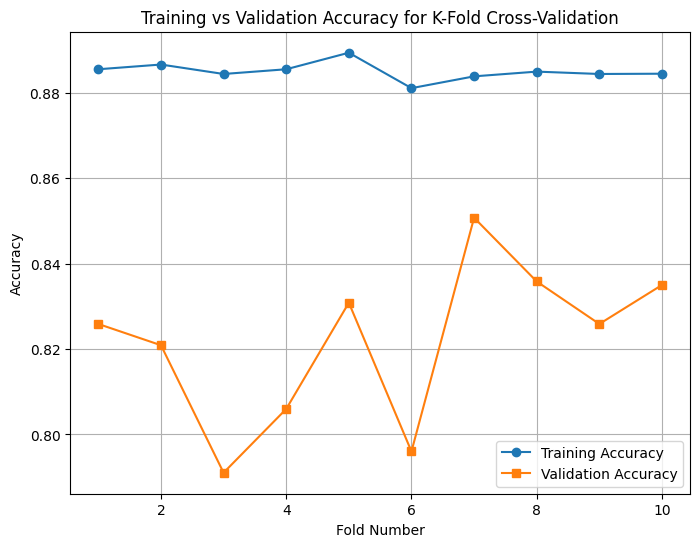

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have W (features) and y (labels) already defined
num_folds = 10

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=40446925)

# List to store fold accuracies
train_accuracies = []
val_accuracies = []

# Perform Stratified K-Fold cross-validation and store fold results
for fold, (train_index, test_index) in enumerate(kf.split(W, y), 1):
    X_train, X_test = W[train_index], W[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the fold's training data
    svc_classifier.fit(X_train, y_train)

    # Make predictions on the test fold
    y_pred = svc_classifier.predict(X_test)

    # Calculate accuracy for this fold
    train_accuracy = accuracy_score(y_train, svc_classifier.predict(X_train))  # Training accuracy
    val_accuracy = accuracy_score(y_test, y_pred)  # Validation accuracy

    # Store the accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print fold results
    print(f"Fold {fold}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Calculate and print overall accuracy (mean across all folds)
overall_accuracy = accuracy_score(y, cross_val_predict(svc_classifier, W, y, cv=kf))
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Plotting the train and validation accuracy
plt.figure(figsize=(8,6))
plt.plot(range(1, num_folds + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_folds + 1), val_accuracies, label='Validation Accuracy', marker='s')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for K-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


###KFOLD best fit

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict
from sklearn.svm import SVC

num_folds = 10

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=40446925)

predicted = cross_val_predict(best_svm_fit, W,y, cv=kf)

for fold, (train_index, test_index) in enumerate(kf.split(W,y), 1):
    y_test = y[test_index]
    y_pred = predicted[test_index]
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("\n")


overall_accuracy = accuracy_score(y, predicted)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

Fold 1: Accuracy = 0.8060
Confusion Matrix:
[[33  0  2  1  0  2]
 [ 5 33  1  2  0  0]
 [ 1  0 31  6  0  1]
 [ 4  1  4 36  1  1]
 [ 0  0  0  3 20  0]
 [ 1  2  1  0  0  9]]


Fold 2: Accuracy = 0.8109
Confusion Matrix:
[[32  4  0  2  0  0]
 [ 4 34  2  1  0  0]
 [ 2  0 31  4  0  2]
 [ 3  0  3 38  2  1]
 [ 0  0  0  1 22  0]
 [ 1  0  3  3  0  6]]


Fold 3: Accuracy = 0.7761
Confusion Matrix:
[[29  4  2  1  0  2]
 [ 0 37  1  1  0  3]
 [ 4  0 26  6  0  3]
 [ 4  2  2 36  2  0]
 [ 0  0  0  2 21  0]
 [ 0  1  4  1  0  7]]


Fold 4: Accuracy = 0.7861
Confusion Matrix:
[[32  3  2  1  0  1]
 [ 6 35  1  0  0  0]
 [ 1  0 31  5  1  0]
 [ 6  0  1 31  7  1]
 [ 0  0  0  0 23  0]
 [ 1  2  4  0  0  6]]


Fold 5: Accuracy = 0.8159
Confusion Matrix:
[[30  2  1  5  0  1]
 [ 0 41  0  0  0  1]
 [ 3  0 28  4  0  3]
 [ 2  5  3 35  1  0]
 [ 0  0  0  1 22  0]
 [ 0  2  2  1  0  8]]


Fold 6: Accuracy = 0.8010
Confusion Matrix:
[[34  2  1  0  0  2]
 [ 6 30  2  4  0  0]
 [ 2  0 29  5  0  2]
 [ 4  0  5 36  1  0]
 [ 0  0

<ipython-input-135-fa7f1a49d396>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = y[test_index]
<ipython-input-135-fa7f1a49d396>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = y[test_index]
<ipython-input-135-fa7f1a49d396>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = y[test_index]
<ipython-input-135-fa7f1a49d396>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a 

<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 1: Train Accuracy = 0.8485, Validation Accuracy = 0.8060
Confusion Matrix:
[[33  0  2  1  0  2]
 [ 5 33  1  2  0  0]
 [ 1  0 31  6  0  1]
 [ 4  1  4 36  1  1]
 [ 0  0  0  3 20  0]
 [ 1  2  1  0  0  9]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 2: Train Accuracy = 0.8413, Validation Accuracy = 0.8109
Confusion Matrix:
[[32  4  0  2  0  0]
 [ 4 34  2  1  0  0]
 [ 2  0 31  4  0  2]
 [ 3  0  3 38  2  1]
 [ 0  0  0  1 22  0]
 [ 1  0  3  3  0  6]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 3: Train Accuracy = 0.8496, Validation Accuracy = 0.7761
Confusion Matrix:
[[29  4  2  1  0  2]
 [ 0 37  1  1  0  3]
 [ 4  0 26  6  0  3]
 [ 4  2  2 36  2  0]
 [ 0  0  0  2 21  0]
 [ 0  1  4  1  0  7]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 4: Train Accuracy = 0.8501, Validation Accuracy = 0.7861
Confusion Matrix:
[[32  3  2  1  0  1]
 [ 6 35  1  0  0  0]
 [ 1  0 31  5  1  0]
 [ 6  0  1 31  7  1]
 [ 0  0  0  0 23  0]
 [ 1  2  4  0  0  6]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 5: Train Accuracy = 0.8490, Validation Accuracy = 0.8159
Confusion Matrix:
[[30  2  1  5  0  1]
 [ 0 41  0  0  0  1]
 [ 3  0 28  4  0  3]
 [ 2  5  3 35  1  0]
 [ 0  0  0  1 22  0]
 [ 0  2  2  1  0  8]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 6: Train Accuracy = 0.8407, Validation Accuracy = 0.8010
Confusion Matrix:
[[34  2  1  0  0  2]
 [ 6 30  2  4  0  0]
 [ 2  0 29  5  0  2]
 [ 4  0  5 36  1  0]
 [ 0  0  0  0 23  0]
 [ 0  1  3  0  0  9]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 7: Train Accuracy = 0.8385, Validation Accuracy = 0.8259
Confusion Matrix:
[[29  5  3  1  0  1]
 [ 2 36  1  2  0  0]
 [ 1  0 32  5  0  0]
 [ 1  1  3 39  1  1]
 [ 0  0  0  2 21  0]
 [ 2  0  2  1  0  9]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 8: Train Accuracy = 0.8457, Validation Accuracy = 0.8209
Confusion Matrix:
[[35  1  0  1  0  2]
 [ 4 35  1  0  0  1]
 [ 2  0 32  4  0  0]
 [ 4  3  3 35  1  0]
 [ 0  0  0  1 22  0]
 [ 1  3  3  1  0  6]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 9: Train Accuracy = 0.8418, Validation Accuracy = 0.8109
Confusion Matrix:
[[31  3  0  1  0  3]
 [ 1 35  1  4  0  0]
 [ 1  0 32  4  1  0]
 [ 3  1  3 36  2  1]
 [ 0  0  0  1 23  0]
 [ 3  0  5  0  0  6]]




<ipython-input-136-bc4b0bb8742b>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


Fold 10: Train Accuracy = 0.8474, Validation Accuracy = 0.8200
Confusion Matrix:
[[32  5  1  0  0  0]
 [ 1 37  1  2  0  0]
 [ 1  0 30  4  1  2]
 [ 3  2  4 34  3  0]
 [ 0  0  0  0 23  0]
 [ 1  2  2  1  0  8]]


Overall Accuracy: 0.8074


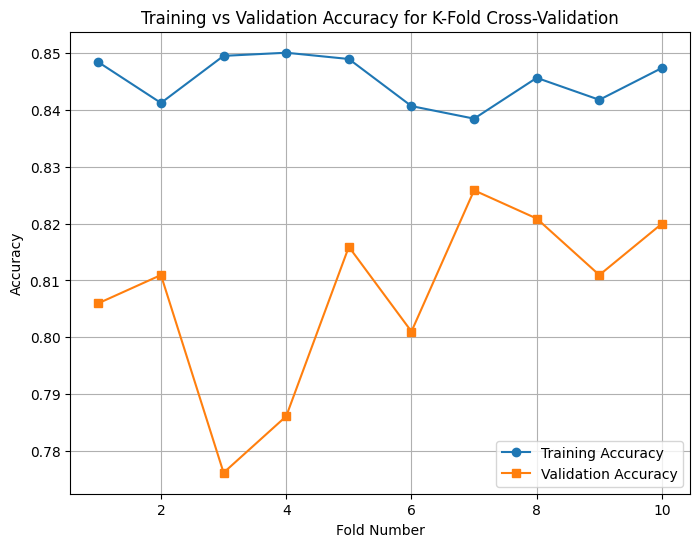

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have W (features) and y (labels) already defined
num_folds = 10

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=40446925)

# List to store fold accuracies
train_accuracies = []
val_accuracies = []

# Perform Stratified K-Fold cross-validation and store fold results
for fold, (train_index, test_index) in enumerate(kf.split(W, y), 1):
    X_train, X_test = W[train_index], W[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the fold's training data
    best_svm_fit.fit(X_train, y_train)

    # Make predictions on the test fold
    y_pred = best_svm_fit.predict(X_test)

    # Calculate accuracy for this fold
    train_accuracy = accuracy_score(y_train, best_svm_fit.predict(X_train))  # Training accuracy
    val_accuracy = accuracy_score(y_test, y_pred)  # Validation accuracy

    # Store the accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print fold results
    print(f"Fold {fold}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Calculate and print overall accuracy (mean across all folds)
overall_accuracy = accuracy_score(y, cross_val_predict(best_svm_fit, W, y, cv=kf))
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Plotting the train and validation accuracy
plt.figure(figsize=(8,6))
plt.plot(range(1, num_folds + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_folds + 1), val_accuracies, label='Validation Accuracy', marker='s')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for K-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()
